# <font color=red> TMDB dataset analysis and recommender system - a begginer's trial</font>
***

# <u> Introduction</u>

In this notebook I will analyze the TMDB dataset, you can find it here:  
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata  

I am a beginner in data science, and this basically is my second try at a recommender system.  
Please send me any questions / suggestions / improvements you have, I am trying to get better at this :).  

Also, if you liked this analysis, please upvote this notebook, and go to my github repository and give it a star at https://github.com/DanielHelps/TMDB-movies-analysis-and-predition, I will realllllllly appreciate it.

This dataset is beefy, so there is alot of information to gather from it, first I will do some EDA and gather some interesting insights, then I will create a simple recommedation system using TF-IDF and cosine similarity

# Initial data prepareation

Let's start by importing required libraries, setting theme and ignoring errors

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
from matplotlib.ticker import EngFormatter
fmt = EngFormatter(places=0)
sns.set_theme(style="dark")

%matplotlib inline

Let's read the data, which consists of movies dataset and credits (cast and crew) dataset

In [106]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

Looking at the head of the movies dataset, we can see many interesting columns, including generes and keywords

In [107]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Let's check out what we can do with the 'genres' column.

In [108]:
movies['genre 1'] = np.nan
movies['genre 2'] = np.nan
movies['genre 3'] = np.nan
movies['genre 4'] = np.nan
movies['genre 5'] = np.nan
movies['genre 6'] = np.nan
movies['genre 7'] = np.nan

We can use eval() to run each cell of "genres" and create a dictionary of the genres, and then put them in columns named genre 1, genre 2, genre 3 etc..

In [109]:
def create_genres(movie):
    genres = eval(movie['genres'])
    for i, gen in enumerate(genres):
        movie.loc[f'genre {i+1}'] = gen['name']
    return movie

movies = movies.apply(lambda x: create_genres(x), axis=1)

In [110]:
genre_list = ['genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5',
       'genre 6', 'genre 7']

We will melt the genre lists into a single column instead of seven and drop cells that have NaN

In [111]:
genres_sum = movies[genre_list].melt().dropna()['value']


# Initial EDA

Let's look at the amount of movies per genre (notice that genres_sum has more values than movie, because most movies have more than 1 genre)

In [112]:
print(genres_sum.shape)

(12160,)


Text(0.5, 0, 'Genre')

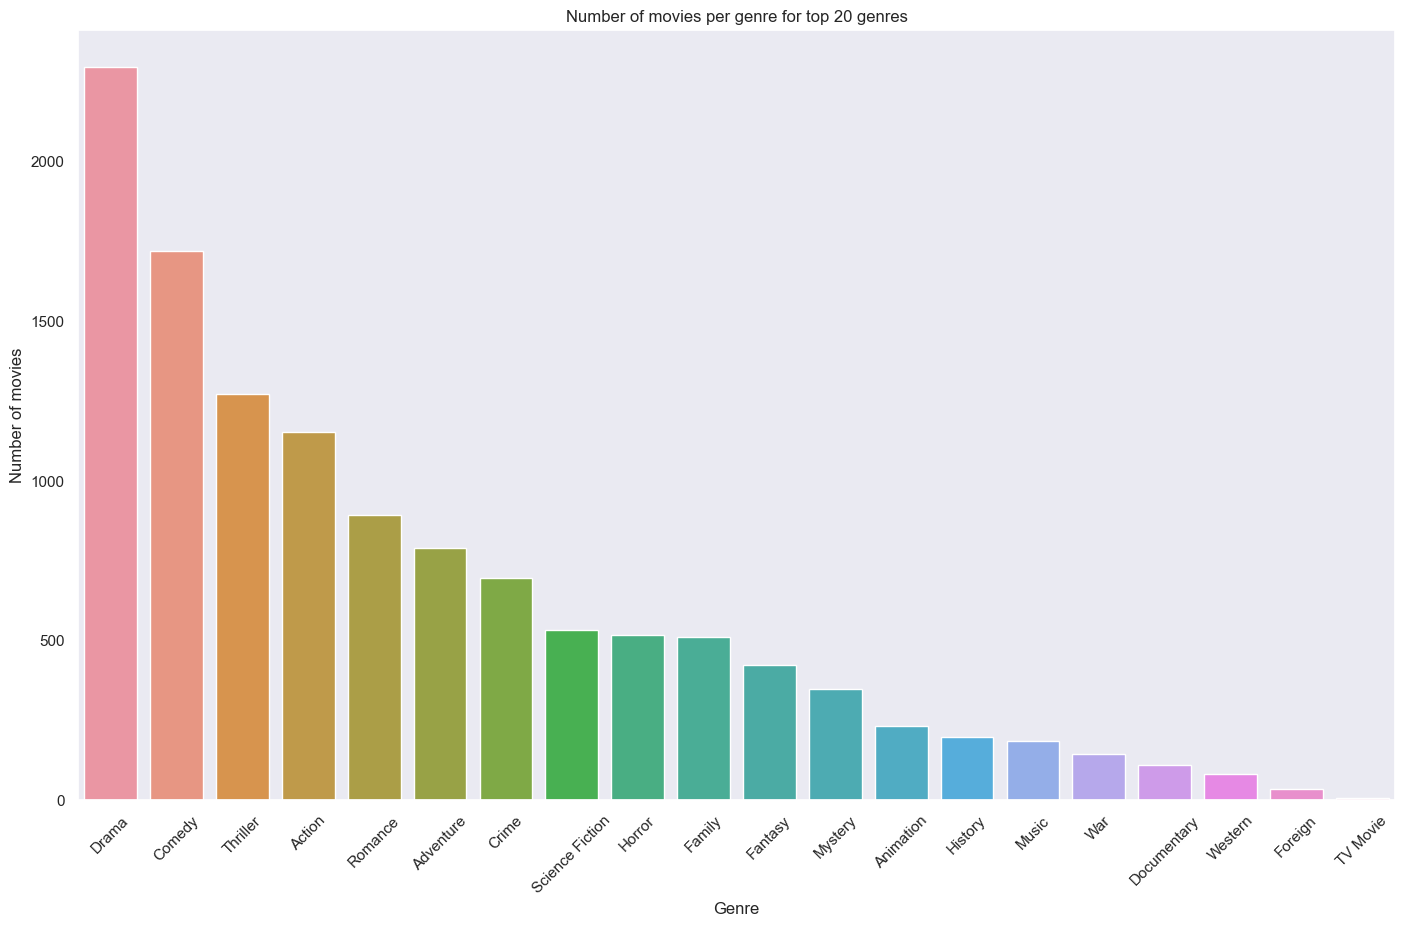

In [113]:
fig, axs = plt.subplots(figsize=(17,10))
a = sns.countplot(x=genres_sum,order=genres_sum.value_counts().index)
axs.tick_params(axis='x', rotation=45)
axs.set_title('Number of movies per genre for top 20 genres')
axs.set_ylabel('Number of movies')
axs.set_xlabel('Genre')

Let's merge the movies and cast dataset based on movie id

In [114]:
credits.drop('title',axis=1,inplace=True)
credits.rename({"movie_id":"id"},inplace=True,axis=1)
df = pd.merge(movies,credits,on='id')

We can look at the correlation between the numerical features of the dataset, and see that there are some distinct correlations, like budget and revenue (which makes sense), or popularity and revenue (also makes sense), but for example budget is not correlated to vote average

Text(0.5, 1.0, 'Correlation between the numerical features of the dataset')

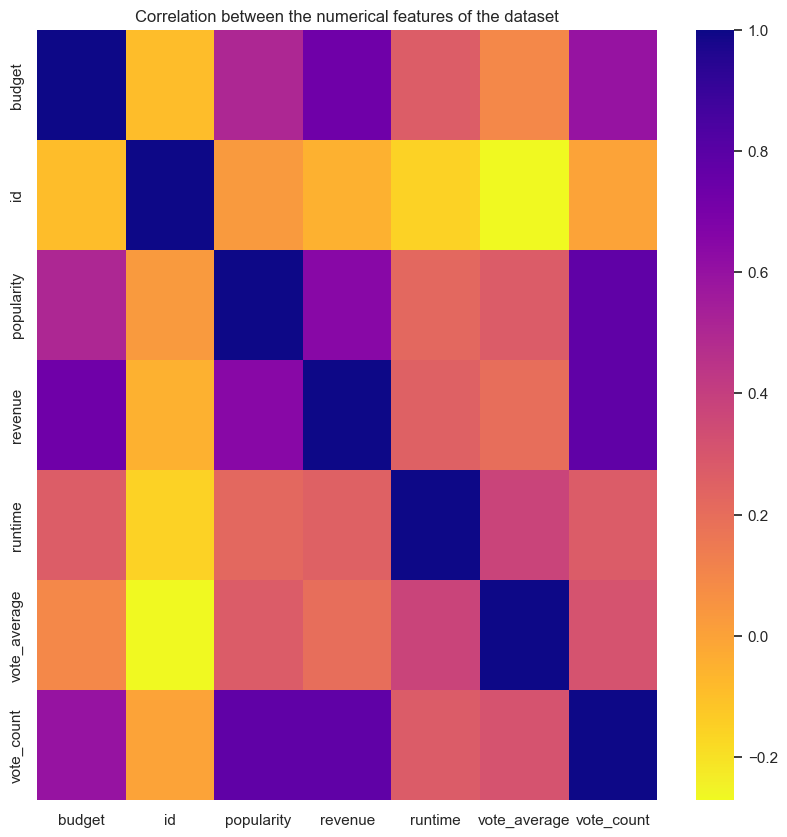

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='plasma_r')
plt.title('Correlation between the numerical features of the dataset')

Next we are going to look at the budgets for the movies in the dataset. The following graph shows the KDE plot for the budget. Most movies are apparently very close to 0 in budget, and there are only a few which have crazy budgets.

Text(0.5, 1.0, 'Budget KDE plot')

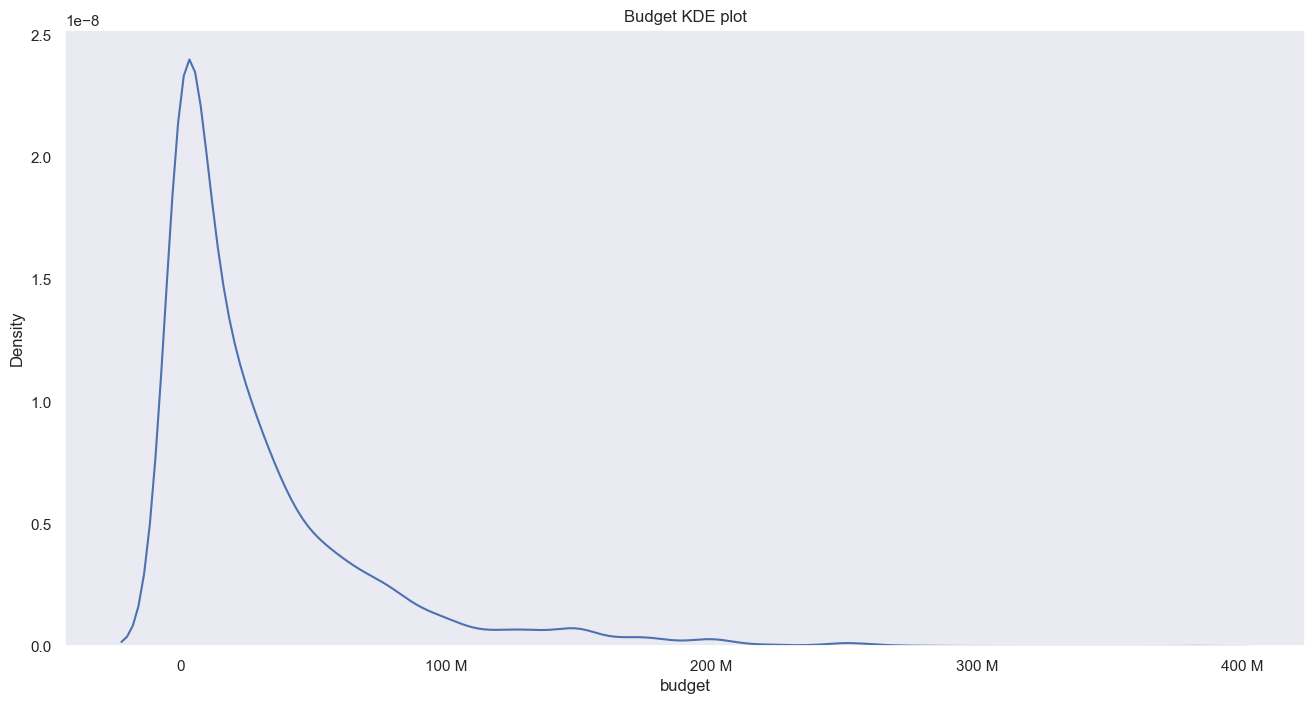

In [116]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.kdeplot(data=movies,x='budget')
ax.xaxis.set_major_formatter(fmt)
ax.set_title('Budget KDE plot')

As I said before, there seems to be a correlation between budget and revenue. We can see it here again. The red line depicts where the movie would break even, meaning any point below the line wasn't profitble, while any point above the line was.

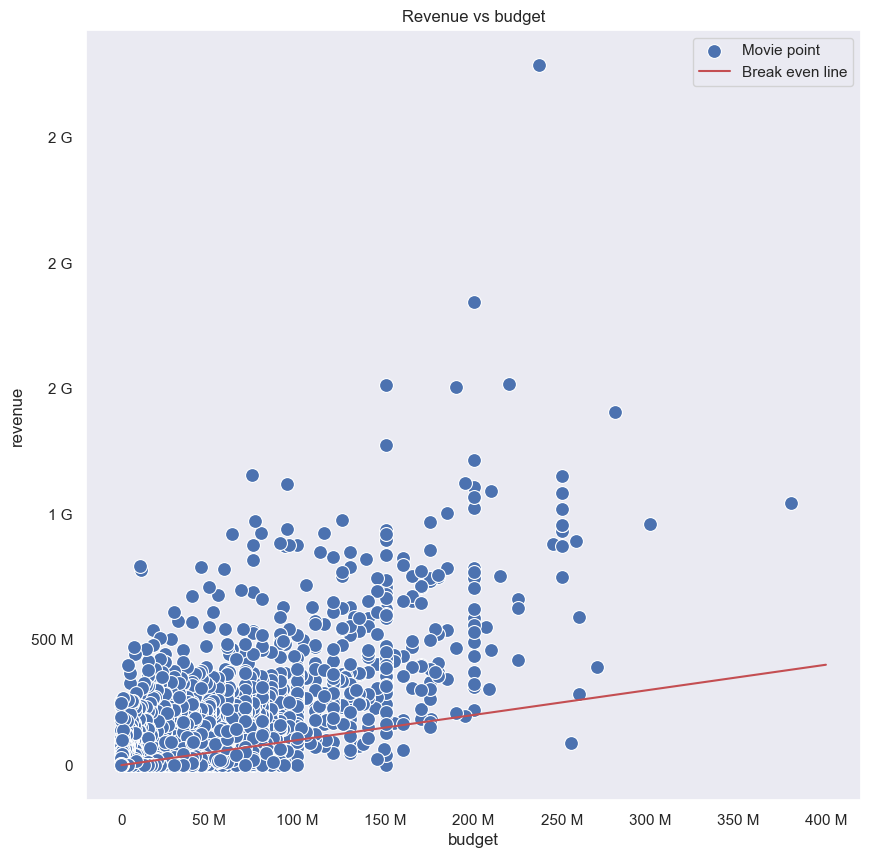

In [117]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=movies, x='budget', y='revenue', s=100)
plt.plot([0, 400000000], [0, 400000000], 'k-', color = 'r')
ax.legend(['Movie point','Break even line'])
plt.title('Revenue vs budget')
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)

Let's find this movie that had around 250M dollar budget but was really horrible in revenue

In [118]:
movies[['title', 'budget', 'revenue']].sort_values(by='budget',ascending=False)[0:15]

,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
46,X-Men: Days of Future Past,250000000,747862775
22,The Hobbit: The Desolation of Smaug,250000000,958400000


It looks like it was "The lone ranger"

In [119]:
movies[movies['title']=='The Lone Ranger']['budget']-movies[movies['title']=='The Lone Ranger']['revenue']

13    165710090
dtype: int64

It lost 165.7M dollars, yikes! This wasn't such a bad movie... Oh well..

Let's check out the number of movies for each vote average

Text(0.5, 1.0, 'Movies vote average count')

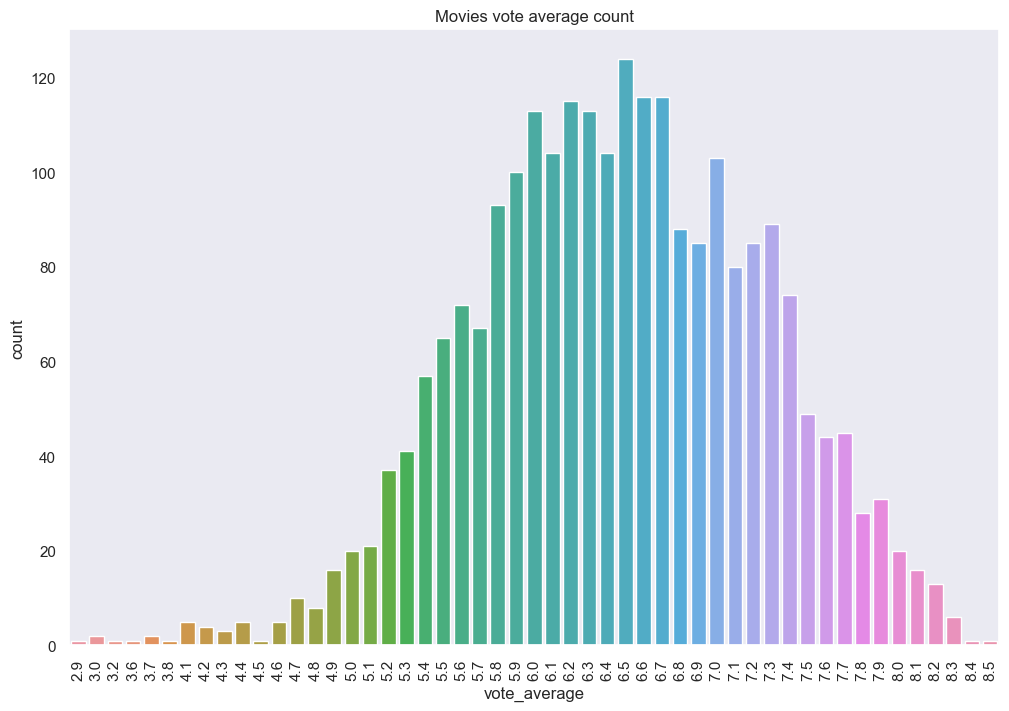

In [120]:
fig, ax = plt.subplots(figsize=(12,8))
votes = df[df['vote_count']>df['vote_count'].median()][genre_list+['id','vote_average']].sort_values(by='vote_average', ascending=False)
sns.countplot(data=votes,x='vote_average')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Movies vote average count')

Most movies seems to have a vote average between 5.8-7.3, intersting!

In [121]:
votes.head()
drama_votes = votes[votes.apply(lambda x: x.isin(['Drama']).any(),axis=1)==True]
comedy_votes = votes[votes.apply(lambda x: x.isin(['Comedy']).any(),axis=1)==True]
thriller_votes = votes[votes.apply(lambda x: x.isin(['Thriller']).any(),axis=1)==True]
horror_votes = votes[votes.apply(lambda x: x.isin(['Horror']).any(),axis=1)==True]

Now let's check out the KDE of the vote average of each genre, ill take 3 of the most popular genres (Drama, Comedy, Thriller) and throw in also horror (that in my experience has lower scores)

Text(0.5, 1.0, 'KDE for vote average for 4 movie genres')

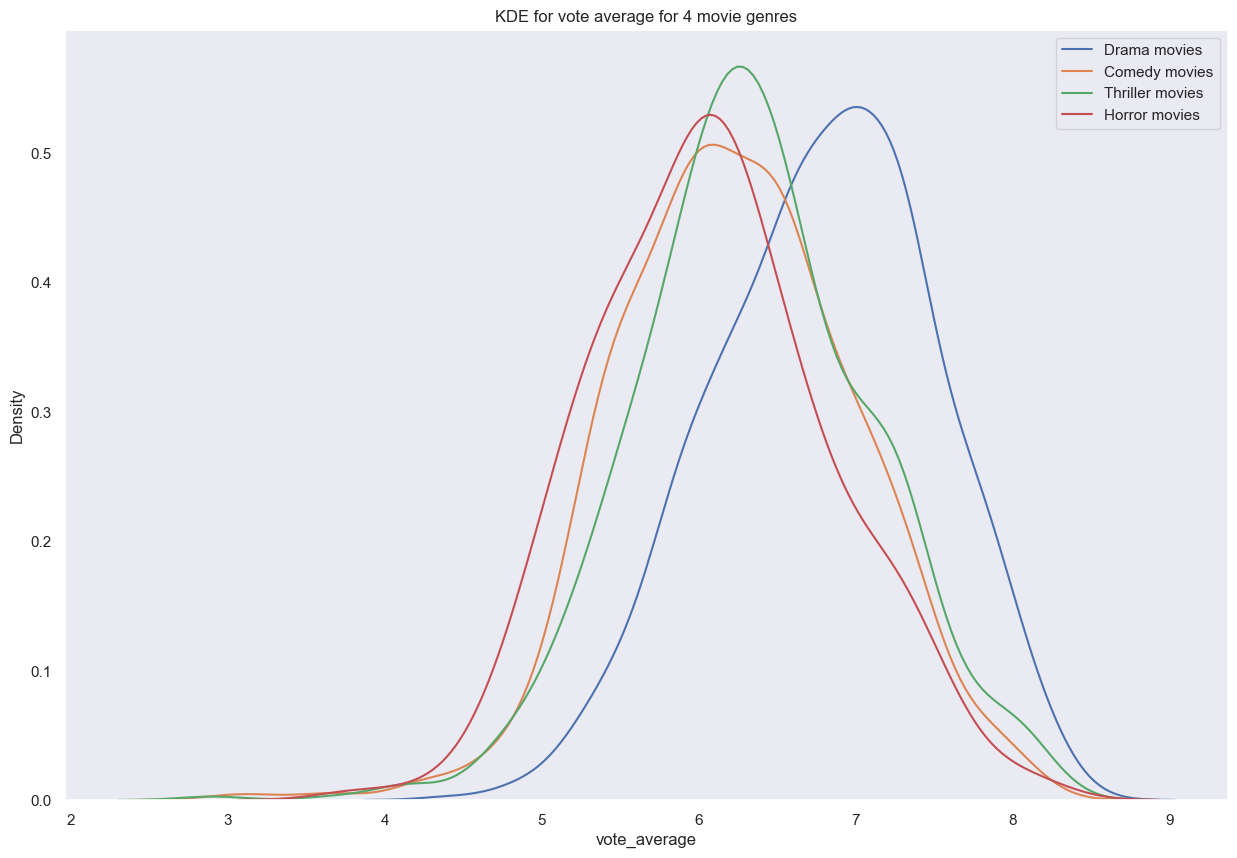

In [122]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(drama_votes['vote_average'])
sns.kdeplot(comedy_votes['vote_average'])
sns.kdeplot(thriller_votes['vote_average'])
sns.kdeplot(horror_votes['vote_average'])
plt.legend(labels=['Drama movies','Comedy movies','Thriller movies','Horror movies'])
plt.title('KDE for vote average for 4 movie genres')

Interestly enough, it seems that Drama has higher score KDE than the other genres, probably makes sense as drama movies usually have more depth and get better scores.  
It's also interesting to see that thriller movies have higher mean but lower variance than horror or comedy.

Let's create a pairplot to see if we can detect interesting insights between the numerical features.

<Figure size 1700x600 with 0 Axes>

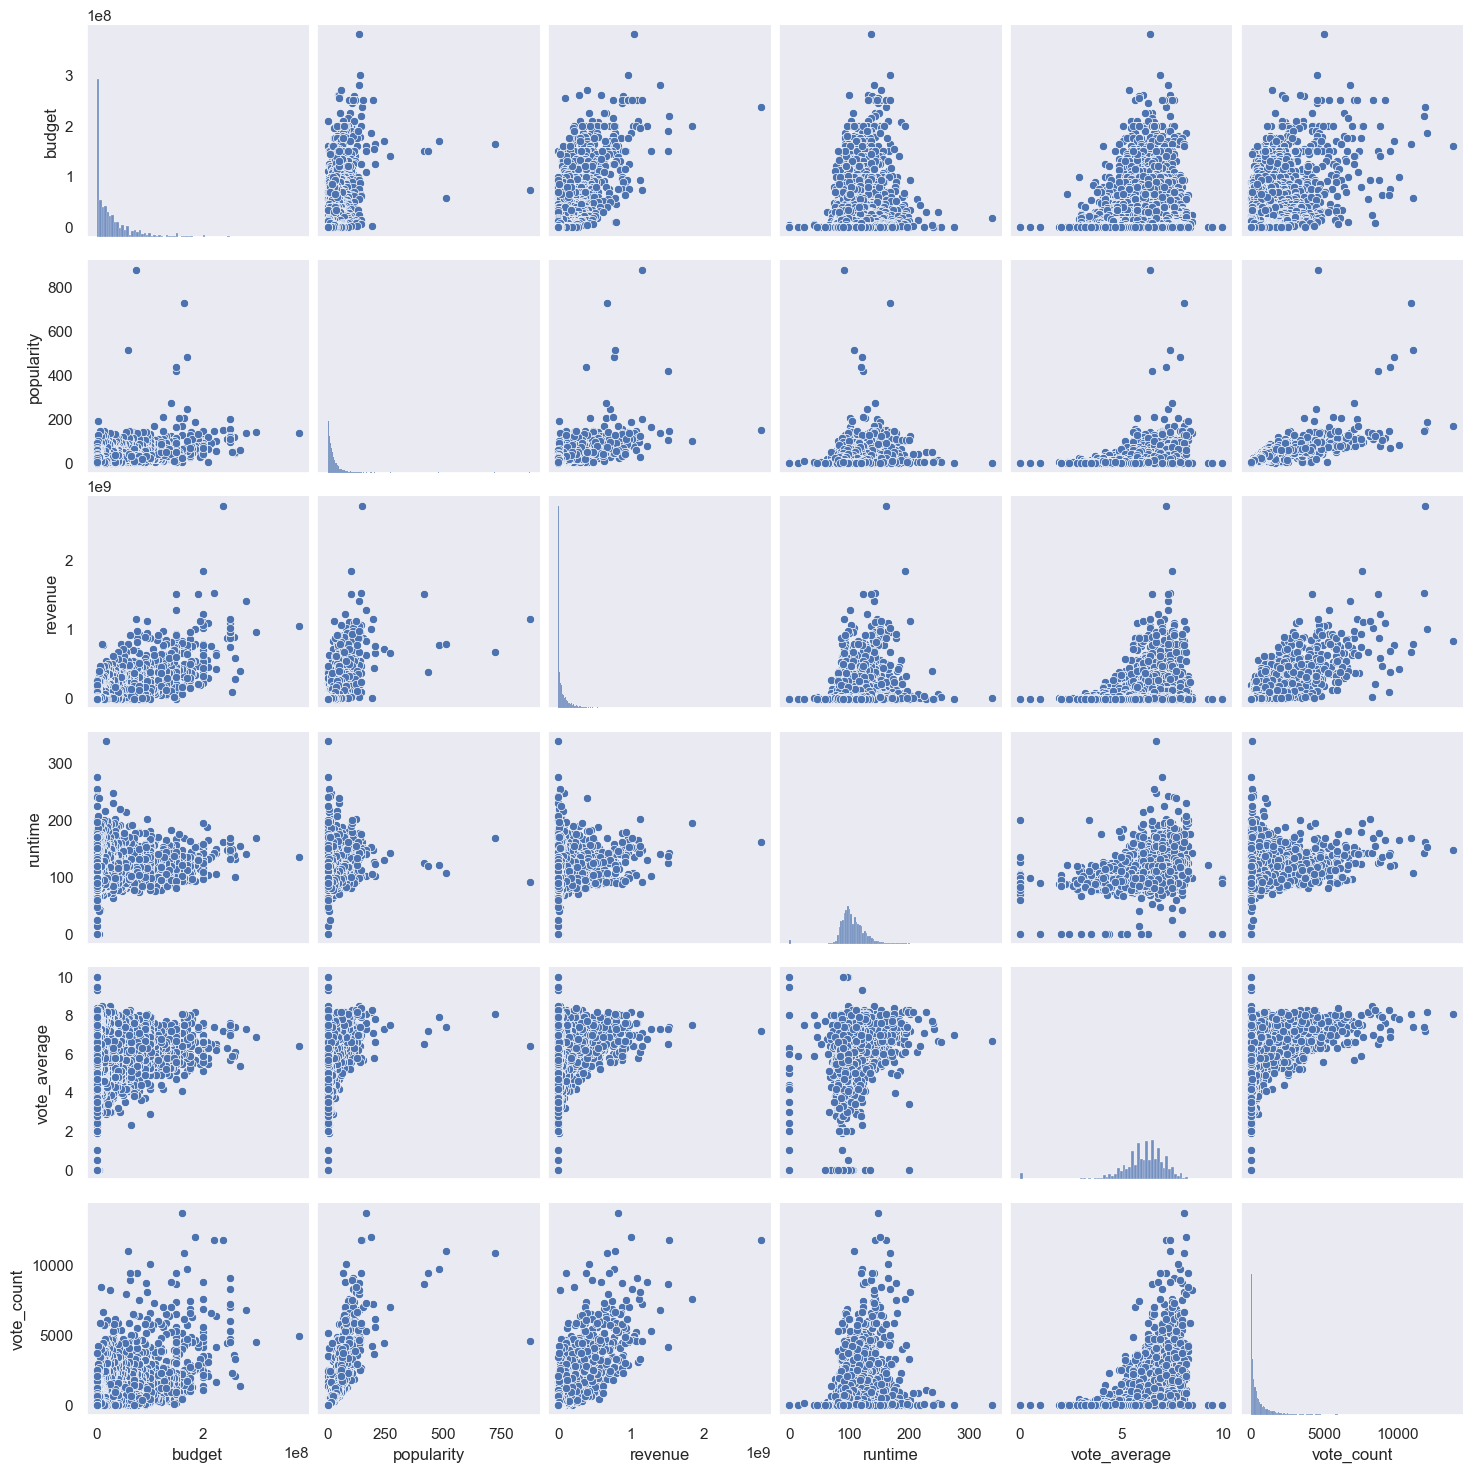

In [123]:
plt.figure(figsize=(17,6))
sns.pairplot(data=df.drop('id',axis=1))

Looking at the KDE plot between the runtime and vote average, it seems that most movies are around 100 minutes and have a vote average of ~6

<AxesSubplot: xlabel='runtime', ylabel='vote_average'>

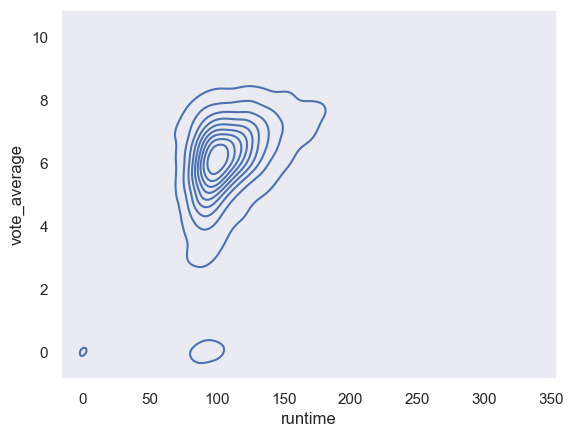

In [124]:
sns.kdeplot(data=df, x='runtime',y='vote_average')

There are some movies with different languages, let's see how many movies are for each language

Text(0.5, 1.0, 'Number of movies for each language')

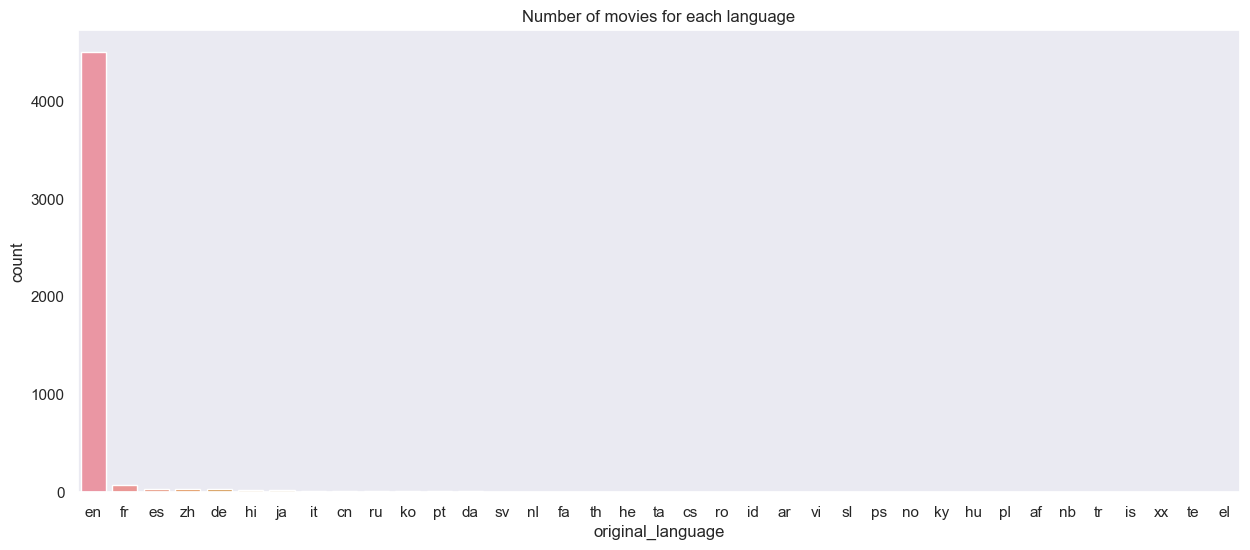

In [125]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='original_language', order=df['original_language'].value_counts().index)
plt.title('Number of movies for each language')

A vary big majority of the movies are in english, therefore let's remove the non-english movies for easier analysis

In [126]:
df = df[df['original_language']=='en']

In [127]:
import datetime
days_dict  = {0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df = df[df['release_date'].isna()==False]
df['release_day'] = df['release_date'].apply(lambda x: days_dict[datetime.datetime.strptime(x,'%Y-%m-%d').weekday()])
release_day_mean = df.groupby(by='release_day').mean()

Let's look at some information regarding the release date of the movies.  
Based on the release date, we can see what day of the week the movie was released. Let's plot some mean information for movies released each day of day week.

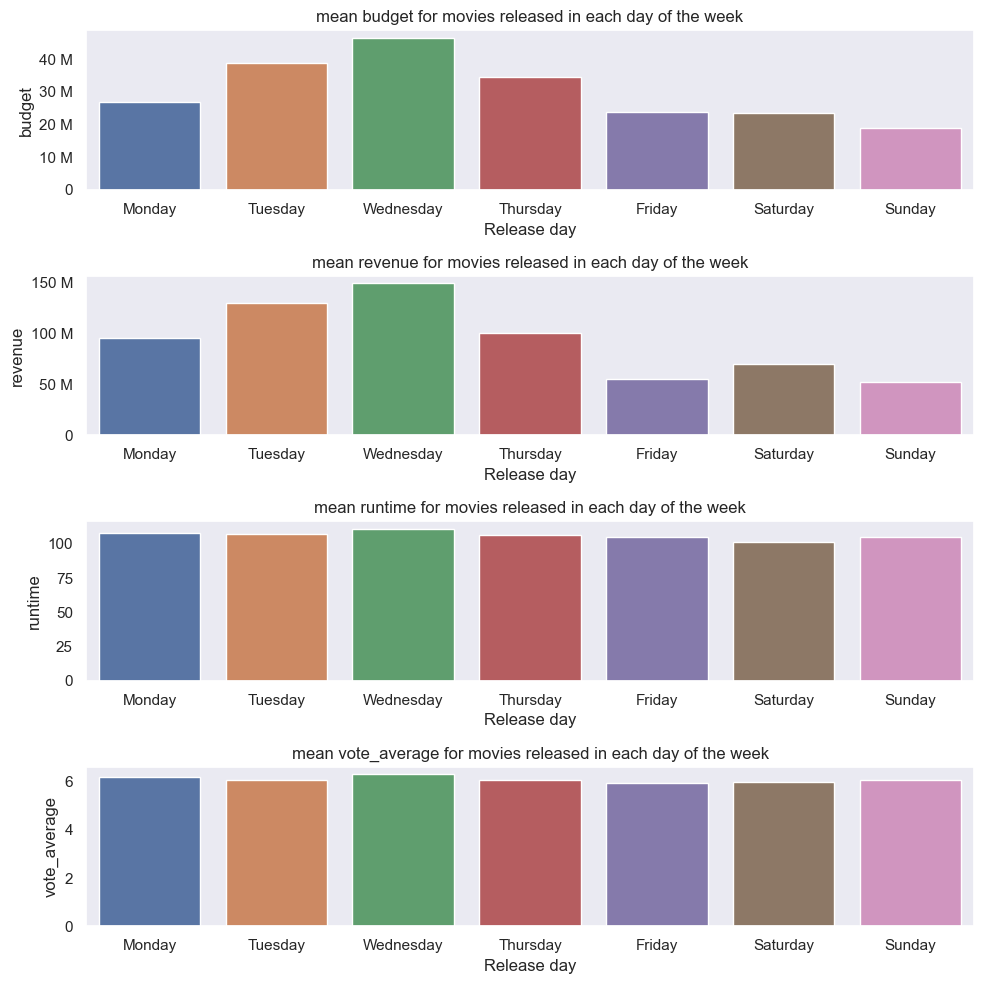

In [128]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
for i,column in enumerate(['budget','revenue', 'runtime', 'vote_average']):
    sns.barplot(ax=ax[i], x=release_day_mean.index, y=release_day_mean[column],order=days_order)
    ax[i].set_xlabel('Release day')
    ax[i].set_title(f'mean {column} for movies released in each day of the week')
    ax[i].yaxis.set_major_formatter(fmt)
fig.tight_layout()

Runtime and vote average seems to be kind of equal, but movies released on wednesday seem to have higher budget and revenue than other days, I wonder why.  
Googling around, LA times has an interesting article about it: https://www.latimes.com/entertainment/la-et-word6-2008aug06-story.html

Now let's create a DataFrame containing all the production companies for each movie

In [129]:
def create_prod_comps(movie):
    prods = eval(movie['production_companies'])
    for i, comp in enumerate(prods):
        movie.loc[f'prod {i+1}'] = comp['name']
    return movie

df_prods = movies.apply(lambda x: create_prod_comps(x), axis=1)

In [130]:
prod_list = [f'prod {i}' for i in range(1,27)]
number_of_prod_comps = (~df_prods[prod_list].isnull()).sum(axis=1)

And now let's show a countplot of number of production companies for each movie

Text(0.5, 1.0, 'Average number of production companies per movie')

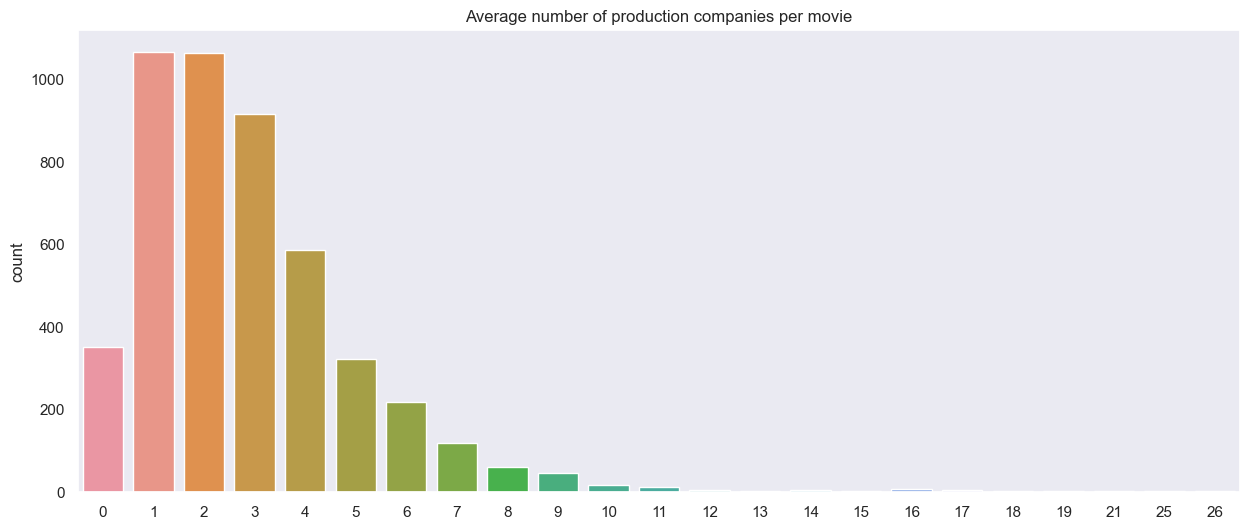

In [131]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x=number_of_prod_comps)
number_of_prod_comps.mean()
plt.title('Average number of production companies per movie')

Most movies seems to have 1 or 2 production companies, and some even have 0 production companies, that's peculiar...

Let's melt all the production companies columns into 1 value column and drop na's...

In [132]:
df_prods = df_prods.melt(id_vars=df_prods.drop(prod_list,axis=1).columns, value_vars=prod_list).dropna(subset=['value'])

Now let us look at the production companies with most movies

Text(0.5, 0, 'Production company')

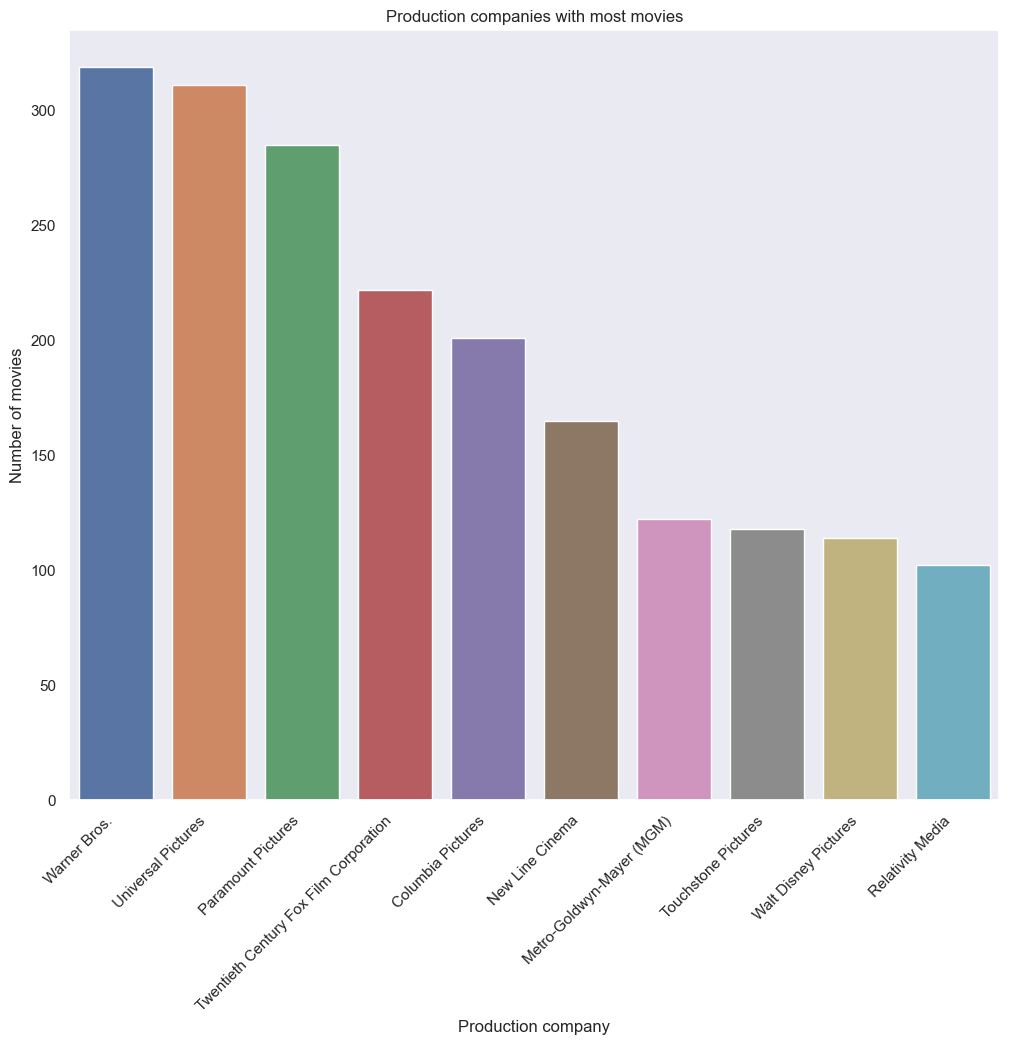

In [133]:
fig, ax = plt.subplots(figsize=(12,10))
df_prods.rename({'value':'prod_company'},axis=1,inplace=True)
top_10_prods = list(df_prods['prod_company'].value_counts().iloc[:10].index)
sns.countplot(x=df_prods['prod_company'], order=top_10_prods)
ax = ax.set_xticklabels(labels=top_10_prods, rotation=45, ha='right')
plt.title('Production companies with most movies')
plt.ylabel('Number of movies')
plt.xlabel('Production company')

Most of those production companies we all know and love. 

In [134]:
df_prods_mean = df_prods.groupby(by='prod_company').mean()
df_prods_sum = df_prods.groupby(by='prod_company').sum()
df_prods_mean_top_10 = df_prods_mean[df_prods_mean.index.isin(top_10_prods)]
df_prods_sum_top_10 = df_prods_sum[df_prods_sum.index.isin(top_10_prods)]

Let's check out their avrage and cumulative stats.

Text(0.5, 0, 'Production company')

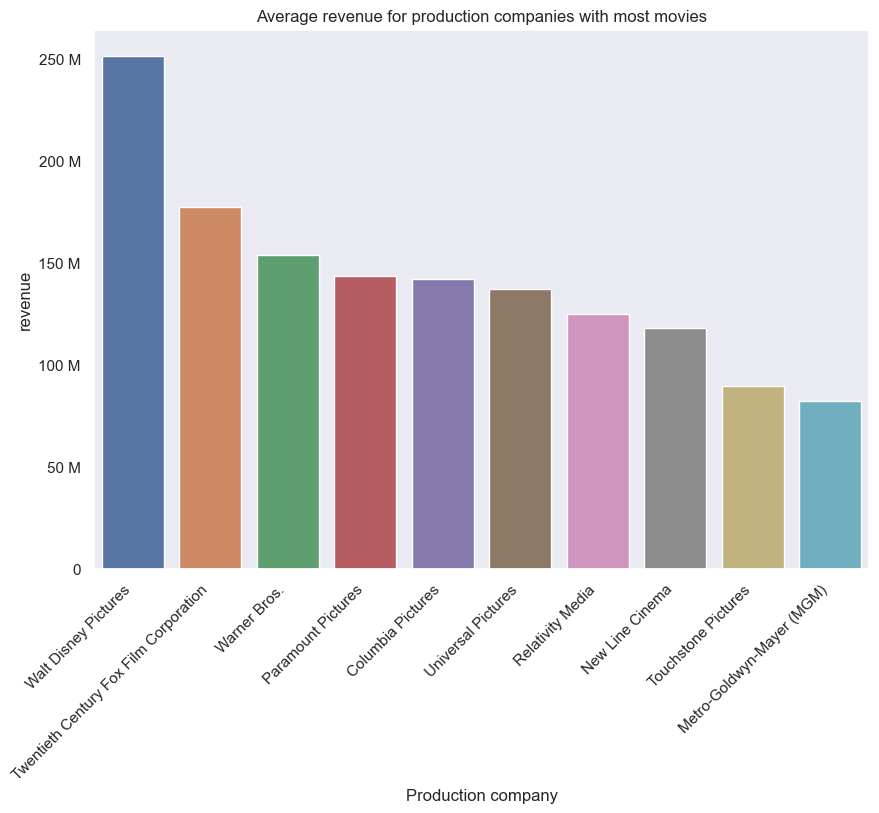

In [135]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.barplot( data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='revenue',order=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Average revenue for production companies with most movies')
plt.xlabel('Production company')

Walt disney has the highest mean revenue for their movies, 20th century fox is far behind at 2nd place

Text(0.5, 0, 'Production company')

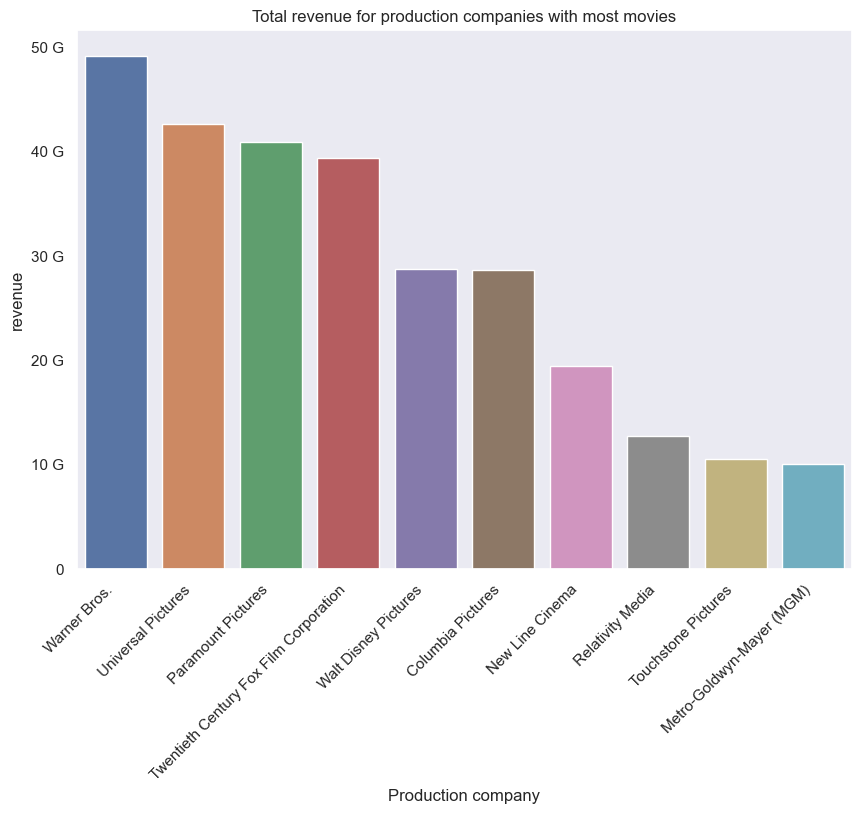

In [136]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_prods_sum_top_10,x=df_prods_sum_top_10.index,y='revenue',order=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Total revenue for production companies with most movies')
plt.xlabel('Production company')

Warner bros. seems to have the highest cumulative revenue, meaning they probably have more movies than walt disney, but each one has a lower revnue

Text(0.5, 0, 'Production company')

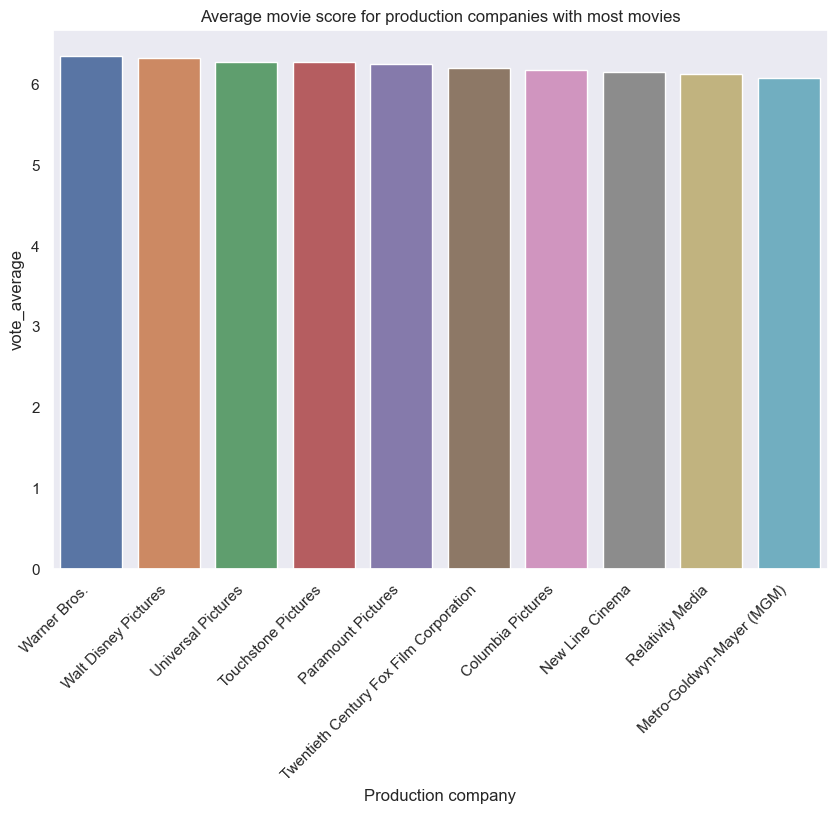

In [137]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='vote_average',order=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.set_title('Average movie score for production companies with most movies')
plt.xlabel('Production company')

Average score for each production company from the top 10 seem very similar, it should be expected but also surprising how close the scores are.

In [138]:
most_rev_prods = df_prods.groupby(by='prod_company').mean()['revenue'].sort_values(ascending=False)[:10]

Now let's look outside of the top 10 companies, and see which companies have the highest average revenue from all companies

Text(0.5, 0, 'Production company')

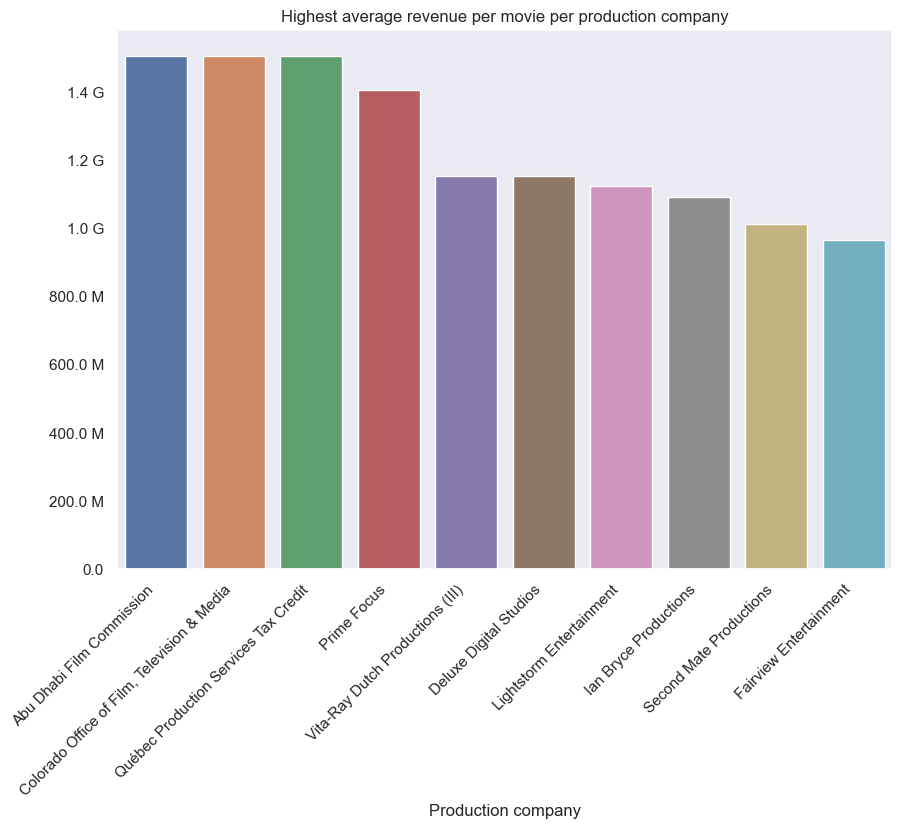

In [139]:
fmt = EngFormatter(places=1)
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=most_rev_prods.index,y=most_rev_prods.values)
ax.set_xticklabels(labels=most_rev_prods.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Highest average revenue per movie per production company')
plt.xlabel('Production company')

Very interesting, none of the top 10 production companies are here, but some weird unrecognized names... I wonder why...  
Let's check which movies those production companies are involved in.

In [140]:
print(f"Abu Dhabi Film Commission movies: {df_prods[df_prods['prod_company']=='Abu Dhabi Film Commission']['title'].values}")
print(f"Colorado Office of Film, Television & Media movies: {df_prods[df_prods['prod_company']=='Colorado Office of Film, Television & Media']['title'].values}")
print(f"Québec Production Services Tax Credit movies: {df_prods[df_prods['prod_company']=='Québec Production Services Tax Credit']['title'].values}")
print(f"Prime Focus movies: {df_prods[df_prods['prod_company']=='Prime Focus']['title'].values}")
print(f"Vita-Ray Dutch Productions (III) movies: {df_prods[df_prods['prod_company']=='Vita-Ray Dutch Productions (III)']['title'].values}")

Abu Dhabi Film Commission movies: ['Furious 7']
Colorado Office of Film, Television & Media movies: ['Furious 7']
Québec Production Services Tax Credit movies: ['Furious 7']
Prime Focus movies: ['Avengers: Age of Ultron']
Vita-Ray Dutch Productions (III) movies: ['Captain America: Civil War']


It seems that those production companies are "riding" on the success of very popular movies.  
Furious 7 is distributed by Universal pictures, but according to this dataset, it is also attributed to multiple no-name companies, and some of them are not even companies...  
This presents a problem with the dataset, where there isn't really a way to know how much much each production company is involved, and "Abu Dhabi Film Commission", "Colorado Office of Film, Television & Media" and "Québec Production Services Tax Credit" get the same credit as the real production company.  
The only way the production companies can be differentiated is by the order they are listed in the prod_companies column.  
Maybe a solution can be to only take the **first** listed production company for each movie.

Now let's look at individual movies

Text(0.5, 1.0, 'Movies with highest revenues')

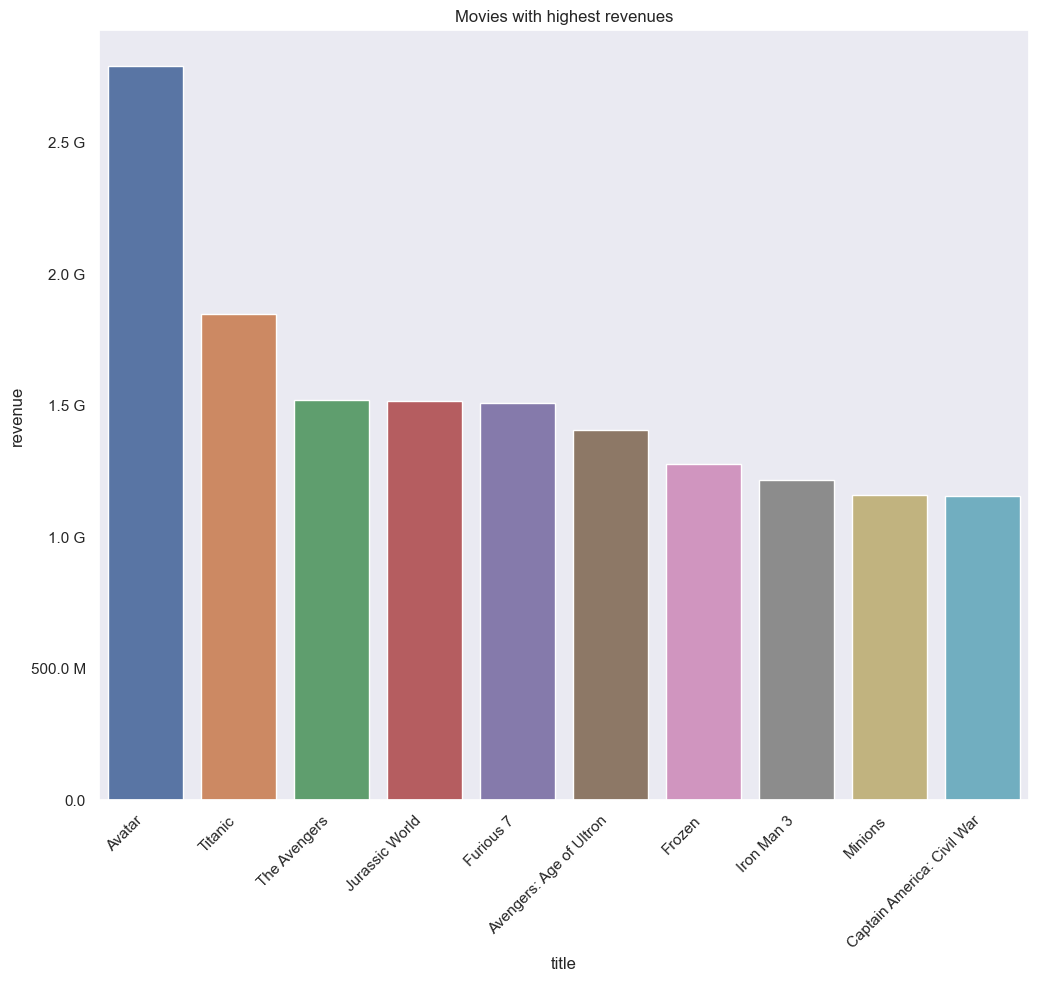

In [141]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=df,x='title',y='revenue', order=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10])
ax.set_xticklabels(labels=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10], rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Movies with highest revenues')

Pretty old dataset, as Avengers: Endgame is not there, but interesting nonetheless..

In [142]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

In [143]:
max_by_year = df[df['vote_count']>50].groupby(by='year').max()
avg_by_year = df[df['vote_count']>50].groupby(by='year').mean()


Now let's explore movies max and mean stats per year

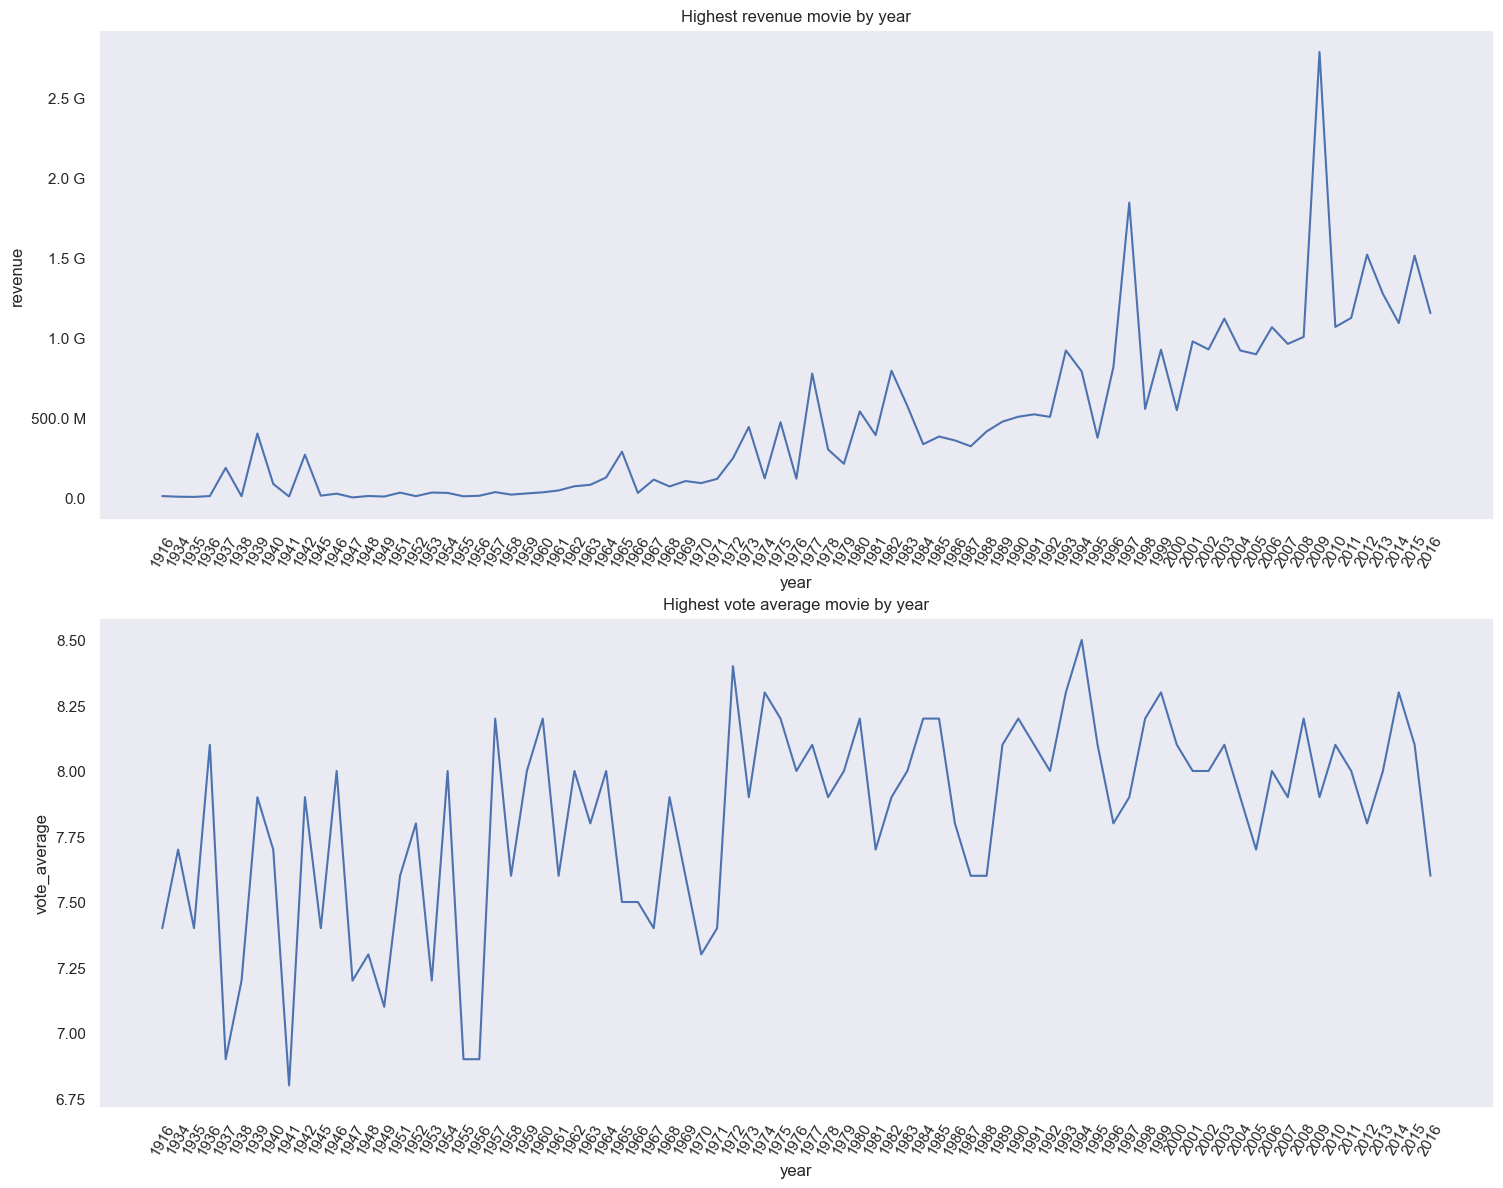

In [144]:
fig, ax = plt.subplots(2,1,figsize=(18,14))

sns.lineplot(ax=ax[0], data=max_by_year,x='year',y='revenue')
ax[0].set_title('Highest revenue movie by year')
ax[0].yaxis.set_major_formatter(fmt)

sns.lineplot(ax=ax[1], data=max_by_year,x='year',y='vote_average')
ax[1].set_title('Highest vote average movie by year')

ax[0].tick_params(axis='x', rotation=60)
ax[1].tick_params(axis='x', rotation=60)

Highest revenue per year seems to have an interesting trend upwards, with a few freaks (James Cameroon doing his magic).  
All this while max vote average goes up only very slightly in the 70's

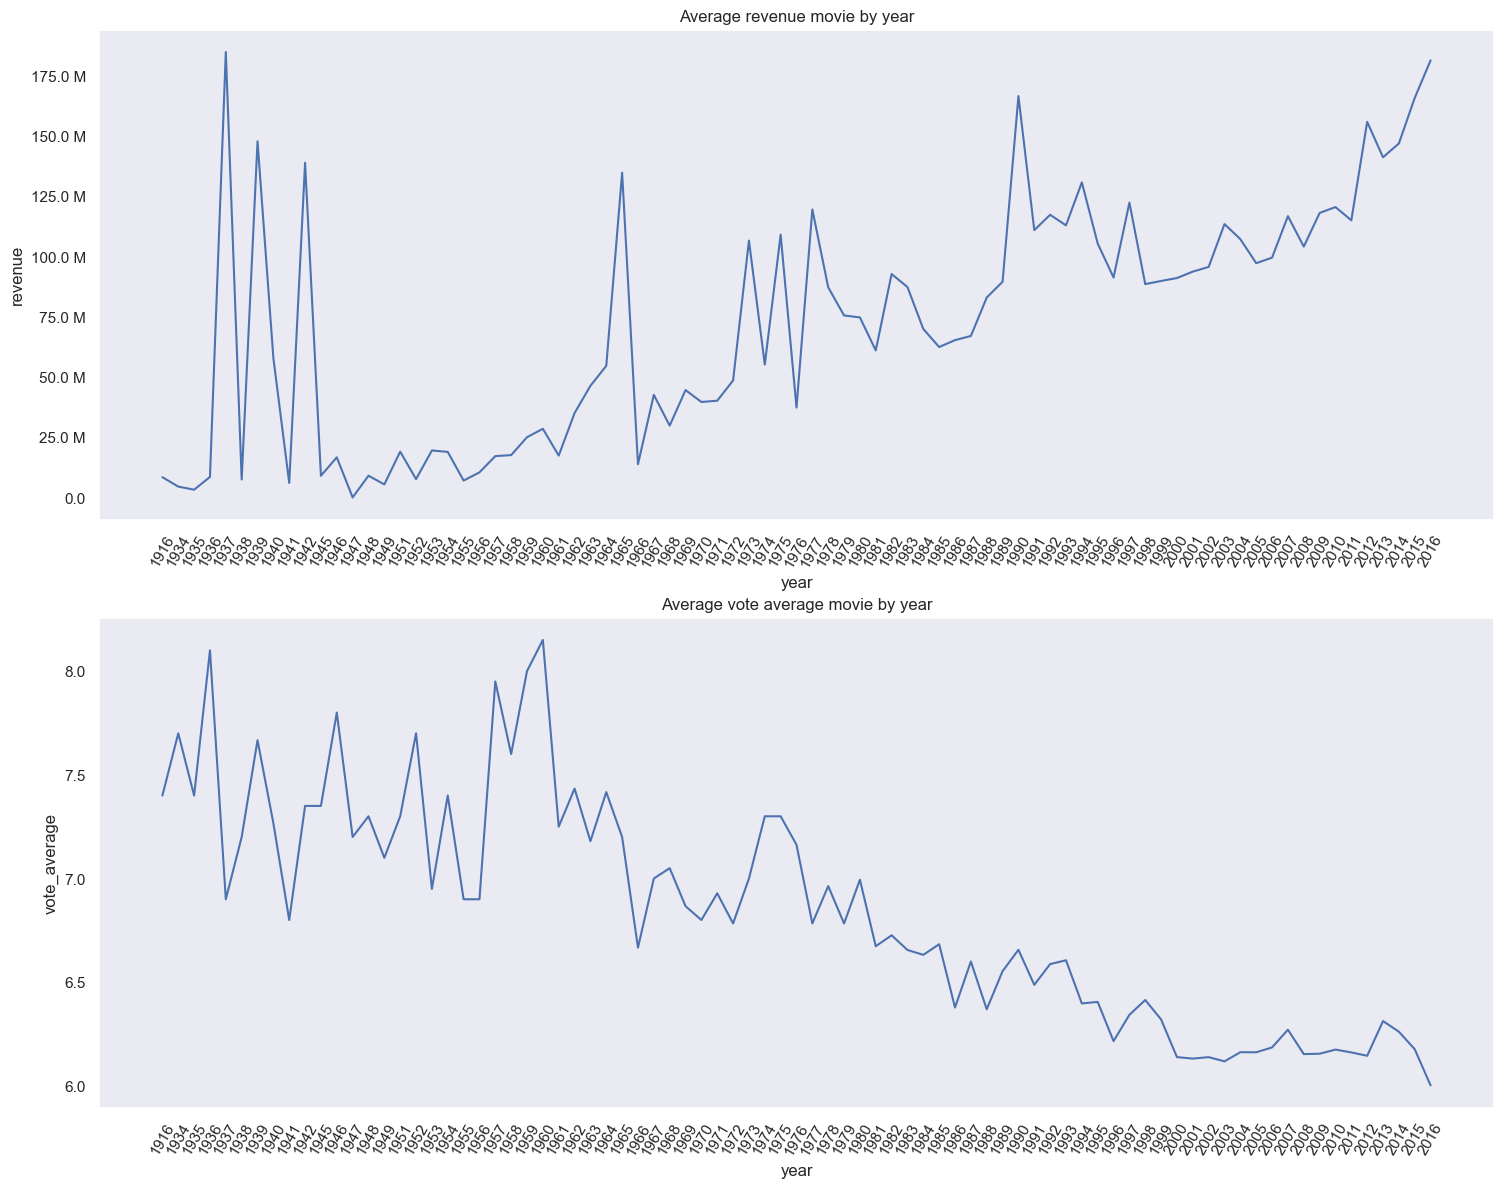

In [145]:
fig, ax = plt.subplots(2,1,figsize=(18,14))

sns.lineplot(ax=ax[0], data=avg_by_year,x='year',y='revenue')
ax[0].set_title('Average revenue movie by year')
ax[0].yaxis.set_major_formatter(fmt)

sns.lineplot(ax=ax[1], data=avg_by_year,x='year',y='vote_average')
ax[1].set_title('Average vote average movie by year')

ax[0].tick_params(axis='x', rotation=60)
ax[1].tick_params(axis='x', rotation=60)

Average stats give a very different picture.  
Mean revenue jumps up like crazy, while vote average plummets. The vote average decrease can happen from multiple reasons, like an increase in number of bad films, voters being harsher critics, etc...

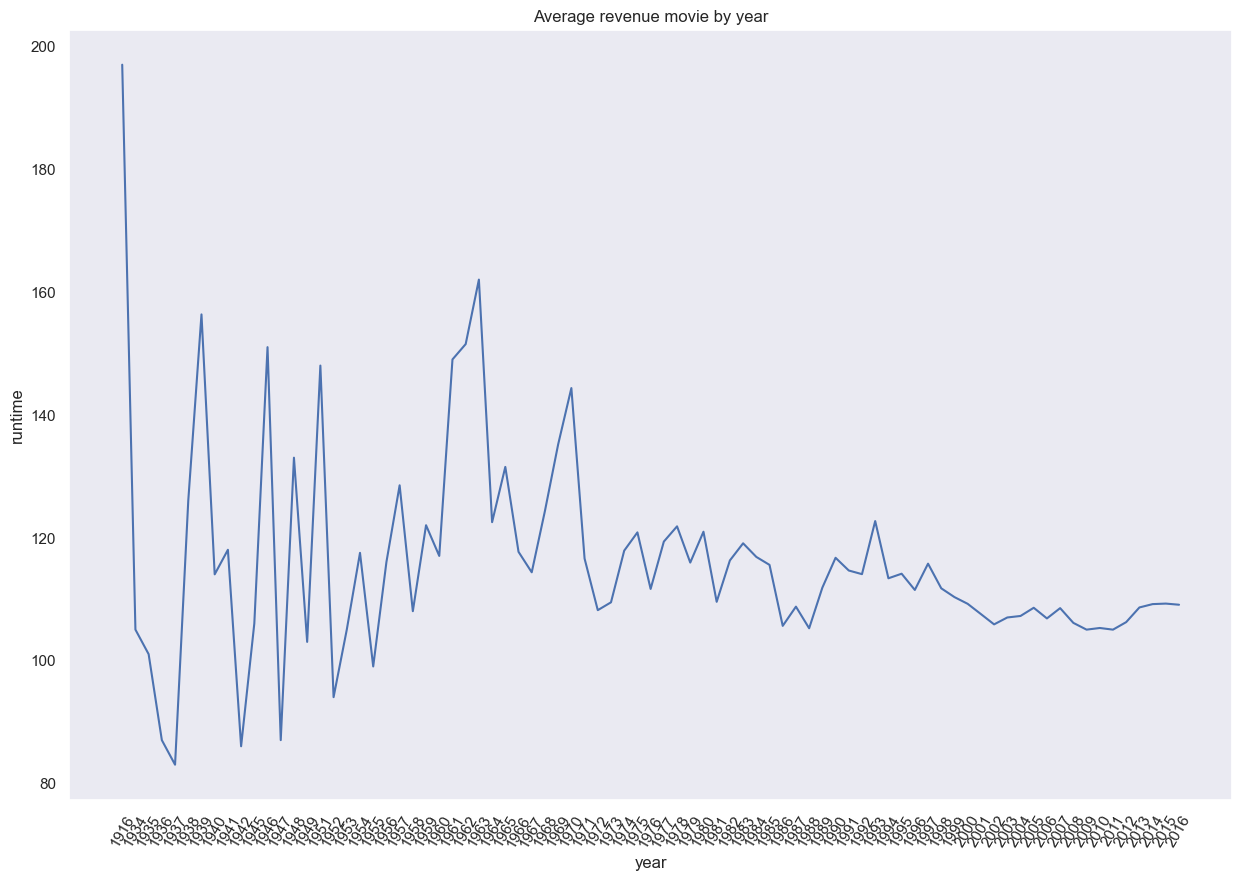

In [146]:
fig, ax = plt.subplots(figsize=(15,10))

sns.lineplot(data=avg_by_year,x='year',y='runtime')
ax.set_title('Average revenue movie by year')
ax.tick_params(axis='x', rotation=60)

Let's look at the "Status" column

In [147]:
df['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [148]:
df[df['status']=='Rumored']['title']

4401         The Helix... Loaded
4453        Crying with Laughter
4508    The Harvest (La Cosecha)
4662              Little Big Top
4754               The Naked Ape
Name: title, dtype: object

In [149]:
df[df['status']=='Post Production']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,cast,crew,release_day,year
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],...,NaN,NaN,NaN,NaN,NaN,NaN,"[{""cast_id"": 1, ""character"": ""Jackie Taylor"", ...","[{""credit_id"": ""54d3585cc3a3686ab90036ff"", ""de...",Friday,2015
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],...,Thriller,NaN,NaN,NaN,NaN,NaN,"[{""cast_id"": 6, ""character"": ""Corinne Walker"",...","[{""credit_id"": ""52fe47dac3a36847f814bcb5"", ""de...",Friday,2011


After googling, all the rumored and the post production movies seems to have been released, thefore the "Status" column doesn't give us any information

Let's take the top 10 actors from each movie and put them as features

In [150]:
actors_from_each_movie = 10

def create_cast(movie):
    actors = eval(movie['cast'])
    for i, actor in enumerate(actors[0:actors_from_each_movie]):
        movie.loc[f'actor {i+1}'] = actor['name']
        movie.loc[f'actor {i+1} gender'] = actor['gender']
    return movie

df_cast = df.apply(lambda x: create_cast(x), axis=1)

In [151]:
actor_list = [f'actor {i}' for i in range(1,11)]
actor_list_gender = [f'actor {i} gender' for i in range(1,11)]

We also created a feature that notes each actor the gender

In [152]:
df_cast

,actor 1,actor 1 gender,actor 10,actor 10 gender,actor 2,actor 2 gender,actor 3,actor 3 gender,actor 4,actor 4 gender,...,release_day,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,Sam Worthington,2.0,Laz Alonso,2.0,Zoe Saldana,1.0,Sigourney Weaver,1.0,Stephen Lang,2.0,...,Thursday,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,Johnny Depp,2.0,Tom Hollander,2.0,Orlando Bloom,2.0,Keira Knightley,1.0,Stellan Skarsgård,2.0,...,Saturday,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,Daniel Craig,2.0,Rory Kinnear,2.0,Christoph Waltz,2.0,Léa Seydoux,1.0,Ralph Fiennes,2.0,...,Monday,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,Christian Bale,2.0,Juno Temple,1.0,Michael Caine,2.0,Gary Oldman,2.0,Anne Hathaway,1.0,...,Monday,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,Taylor Kitsch,2.0,Bryan Cranston,2.0,Lynn Collins,1.0,Samantha Morton,1.0,Willem Dafoe,2.0,...,Wednesday,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Saturday,0,80.0,[],Released,NaN,Cavite,7.5,2,2005
4799,Edward Burns,2.0,NaN,NaN,Kerry Bishé,1.0,Marsha Dietlein,1.0,Caitlin Fitzgerald,1.0,...,Monday,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,2011
4800,Eric Mabius,2.0,NaN,NaN,Kristin Booth,1.0,Crystal Lowe,1.0,Geoff Gustafson,0.0,...,Sunday,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,2013
4801,Daniel Henney,2.0,NaN,NaN,Eliza Coupe,1.0,Bill Paxton,2.0,Alan Ruck,2.0,...,Thursday,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,2012


By melting the actors list columns, we can create 1 column that displays the actors and gender

In [153]:
df_cast_2 = df_cast.melt(id_vars=df_cast.drop(actor_list,axis=1).columns, value_vars=(actor_list))

In [154]:
df_cast_2['gender'] = df_cast_2.apply(lambda x: x[x['variable']+" gender"], axis=1)
df_cast_2.rename({"value":"actor_name"},inplace=True,axis=1)
df_cast_2.drop(actor_list_gender + ['variable'],axis=1,inplace=True)

In [155]:
df_cast_2.head()

,budget,cast,crew,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,actor_name,gender
0,237000000,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,Sam Worthington,2.0
1,300000000,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure,Fantasy,Action,NaN,NaN,NaN,NaN,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,Johnny Depp,2.0
2,245000000,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action,Adventure,Crime,NaN,NaN,NaN,NaN,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,Daniel Craig,2.0
3,250000000,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action,Crime,Drama,Thriller,NaN,NaN,NaN,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,Christian Bale,2.0
4,260000000,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,Taylor Kitsch,2.0


In [156]:
df_cast_2['gender'].value_counts()

2.0    24330
1.0    12127
0.0     5824
Name: gender, dtype: int64

Around double the amount of male actors to female ones.  
Interestingly enough, there are 5824 people without a gender. Could be something to do with political correctness, but most likely just missing data.  

In [157]:
df_cast_2[df_cast_2['gender'].isnull()==True].head()

,budget,cast,crew,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,actor_name,gender
2525,0,[],"[{""credit_id"": ""52fe473b9251416c750921ff"", ""de...",Family,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Barney's Great Adventure,2.9,8,1998,NaN,NaN
3492,0,[],[],Family,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,[],Released,NaN,Running Forever,0.0,0,2015,NaN,NaN
3779,0,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,[],Released,NaN,Sardaarji,9.5,2,2015,NaN,NaN
3792,2500000,[],"[{""credit_id"": ""52fe4ae1c3a368484e16bcd7"", ""de...",Documentary,NaN,NaN,NaN,NaN,NaN,NaN,...,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Love Him, Hate Him, You Don't Know Him",2016: Obama's America,4.6,19,2012,NaN,NaN
3847,0,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,[],Released,NaN,Sharkskin,0.0,0,2015,NaN,NaN


Alot of rows don't have actors at all...  
Let's drop the genderless people (sorry!) and the lines without actors.

In [158]:
df_cast_3 = df_cast_2[(df_cast_2['gender']!=0) & (df_cast_2['gender'].isnull()==False)]

Now we need to change 1.0 and 2.0 to "Female" and "Male" and we can explore the actors.  
For example, we can take the actors that acted in the most movies, and check statistics about them.

In [159]:
df_cast_3.loc[:, 'gender'] = df_cast_3['gender'].replace([2.0, 1.0],['Male','Female'])
top_actors = df_cast_3['actor_name'].value_counts()[df_cast_3['actor_name'].value_counts()>5]
df_cast_3 = df_cast_3[df_cast_3['actor_name'].isin(top_actors.index)]
top_actors

Samuel L. Jackson    58
Robert De Niro       55
Morgan Freeman       45
Bruce Willis         42
Matt Damon           41
                     ..
Deirdre O'Connell     6
Kim Hunter            6
Anna Levine           6
Emilio Estevez        6
John Ratzenberger     6
Name: actor_name, Length: 1581, dtype: int64

Calculate sum of movies they participated in, mean revenue for their movies, mean runtime etc..

In [160]:
cast_sum = df_cast_3.groupby(by='actor_name').agg({'revenue':'sum', 'gender':'first'})
cast_avg = df_cast_3.groupby(by='actor_name').agg({'revenue':'mean', 'runtime':'mean', 'vote_average':'mean','gender':'first'})

In [161]:
top_10_cast_sum = cast_sum.sort_values(by='revenue',ascending=False)[0:10]

Now we can plot the information on a graph for the top 10 actors

Text(0.5, 1.0, 'Sum of movies revenue for top actors')

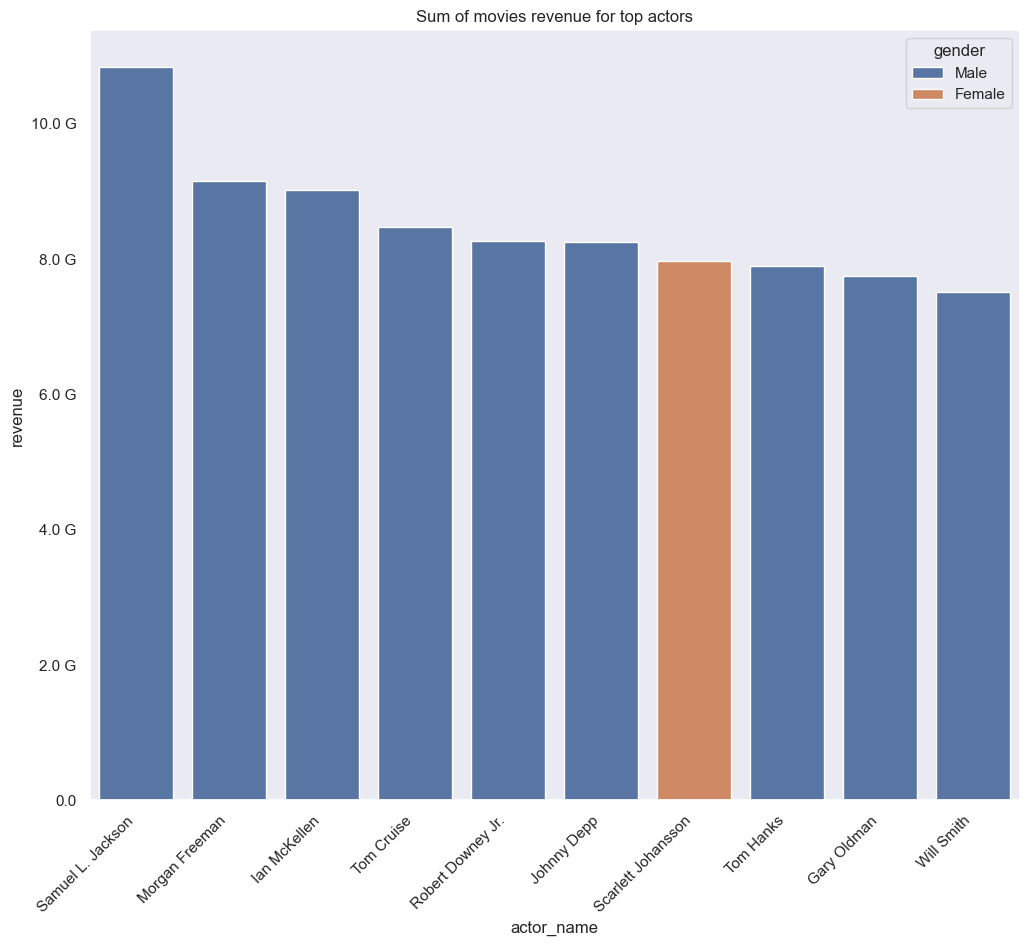

In [162]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=top_10_cast_sum, x=top_10_cast_sum.index, y='revenue', hue='gender', dodge=False)
ax.set_xticklabels(labels = top_10_cast_sum.index,  rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Sum of movies revenue for top actors')

First, it looks like there's only 1 female actress in the top 10 actors...  
Samuel L. Jackson really killed it, participating in movies that garnered more than 11 billion dollars!

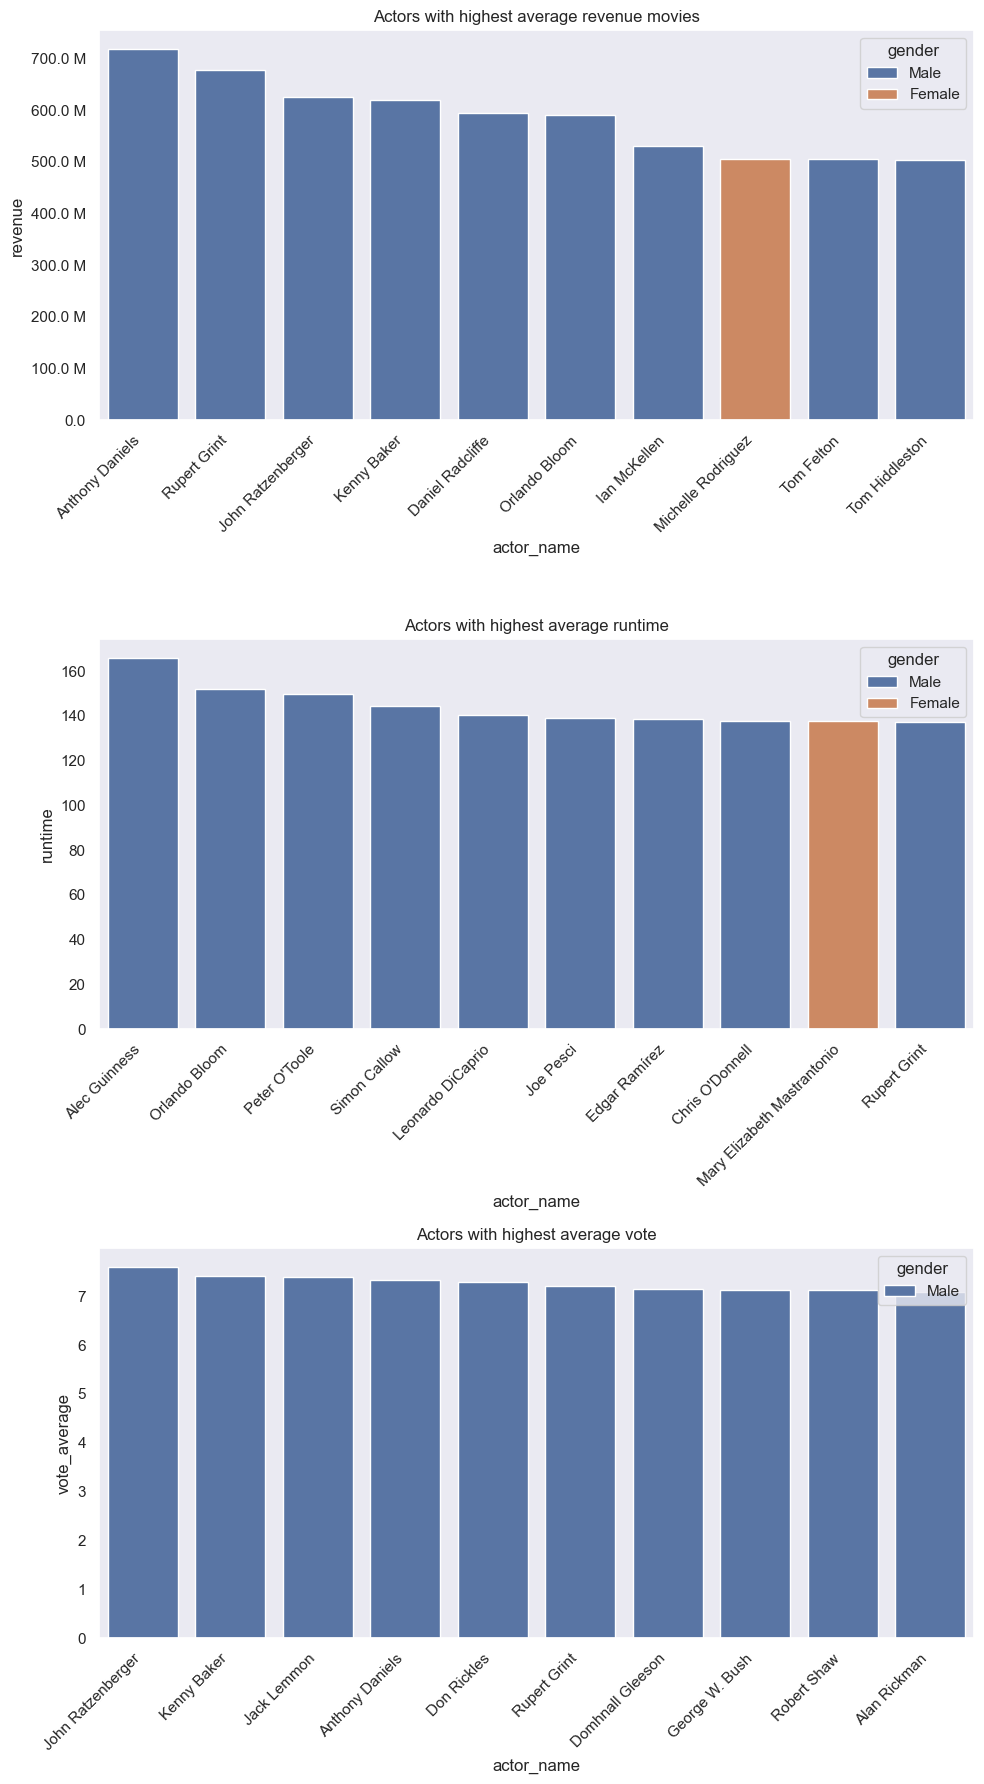

In [163]:
cast_avg_rev = cast_avg.sort_values(by='revenue',ascending=False)[0:10]
cast_avg_runtime = cast_avg.sort_values(by='runtime',ascending=False)[0:10]
cast_avg_vote = cast_avg.sort_values(by='vote_average',ascending=False)[0:10]

fig, ax = plt.subplots(3,1, figsize=(10,18))

sns.barplot(ax=ax[0], x=cast_avg_rev.index, y=cast_avg_rev['revenue'],hue=cast_avg_rev['gender'],dodge=False)
ax[0].yaxis.set_major_formatter(fmt)
ax[0].set_title('Actors with highest average revenue movies')
ax[0].set_xticklabels(labels = cast_avg_rev.index,  rotation=45, ha='right')

sns.barplot(ax=ax[1], x=cast_avg_runtime.index, y=cast_avg_runtime['runtime'],hue=cast_avg_runtime['gender'],dodge=False)
ax[1].set_title('Actors with highest average runtime')
ax[1].set_xticklabels(labels = cast_avg_runtime.index,  rotation=45, ha='right')

sns.barplot(ax=ax[2], x=cast_avg_vote.index, y=cast_avg_vote['vote_average'],hue=cast_avg_vote['gender'],dodge=False)
ax[2].set_title('Actors with highest average vote')
ax[2].set_xticklabels(labels = cast_avg_vote.index,  rotation=45, ha='right')

fig.tight_layout()

Continuting to look at the top actors, mean values give a different picture. There are some unknown names.  
Anthony Daniels for example has the highest mean revenue of movies. Googling him, apparently he is the only actor to appear in all star wars movies, therefore very high revenue average.

In [164]:
df_cast_3[df_cast_3['actor_name']=='Rupert Grint']

,budget,cast,crew,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,actor_name,gender
4512,250000000,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...",Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,...,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,2009,Rupert Grint,Male
4616,150000000,"[{""cast_id"": 22, ""character"": ""Harry Potter"", ...","[{""credit_id"": ""52fe4268c3a36847f801c489"", ""de...",Adventure,Fantasy,Family,Mystery,NaN,NaN,NaN,...,138.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Evil Must Be Confronted.,Harry Potter and the Order of the Phoenix,7.4,5494,2007,Rupert Grint,Male
4617,150000000,"[{""cast_id"": 1, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4268c3a36847f801c275"", ""de...",Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,...,157.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Dark And Difficult Times Lie Ahead.,Harry Potter and the Goblet of Fire,7.5,5608,2005,Rupert Grint,Male
4694,130000000,"[{""cast_id"": 1, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4268c3a36847f801c0e7"", ""de...",Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Something wicked this way comes.,Harry Potter and the Prisoner of Azkaban,7.7,5877,2004,Rupert Grint,Male
4700,125000000,"[{""cast_id"": 27, ""character"": ""Harry Potter"", ...","[{""credit_id"": ""52fe4267c3a36847f801be1d"", ""de...",Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,7.5,7006,2001,Rupert Grint,Male
4778,100000000,"[{""cast_id"": 23, ""character"": ""Harry Potter"", ...","[{""credit_id"": ""52fe4267c3a36847f801bf67"", ""de...",Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,...,161.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hogwarts is back in session.,Harry Potter and the Chamber of Secrets,7.4,5815,2002,Rupert Grint,Male
8005,0,"[{""cast_id"": 3, ""character"": ""Laura Marshall"",...","[{""credit_id"": ""52fe44399251416c7502d26b"", ""de...",Drama,Comedy,NaN,NaN,NaN,NaN,NaN,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Driving Lessons,6.3,47,2006,Rupert Grint,Male
12160,8000000,"[{""cast_id"": 1, ""character"": ""Victor Maynard"",...","[{""credit_id"": ""5548c4e5c3a368787b002225"", ""de...",Action,Comedy,NaN,NaN,NaN,NaN,NaN,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They said 'Take her out'. He got the wrong idea.,Wild Target,6.4,215,2010,Rupert Grint,Male


Also Rupert Grint appeared in every Harry Potter movie as Ron, but didn't seem to appear in many more movies other than that, keeping a high average revenue.

# Cleaning the text and EDA

Let's start by removing the stopwords in the text using nltk library

In [165]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [166]:
def clean_text(text):
    split_text = text.split()
    clean_text = ''
    for word in split_text:
        clean_text += f'{word} ' if word.lower() not in stopwords.words('english') else ''
    return clean_text

Let's create "keyword" features (and also clean it) and then make it a sentence consisting of these keywords

In [167]:
keywords_from_each_movie = 10

def create_keywords(movie):
    keywords = eval(movie['keywords'])
    for keyword in keywords[0:keywords_from_each_movie]:
        split_keyword = keyword['name'].split()
        for word in split_keyword:
            movie.loc['keywords_sentence'] += f" {word}" if word not in stopwords.words('english') else ""
    return movie

df_keywords = df
df_keywords['keywords_sentence'] = ""
df_keywords = df_keywords.apply(lambda x: create_keywords(x), axis=1)

We can look at the most common keywords

('based', 'relationship', 'film', 'woman', 'independent', 'love', 'director', 'war', 'novel', 'duringcreditsstinger')


Text(0, 0.5, 'Occurence count')

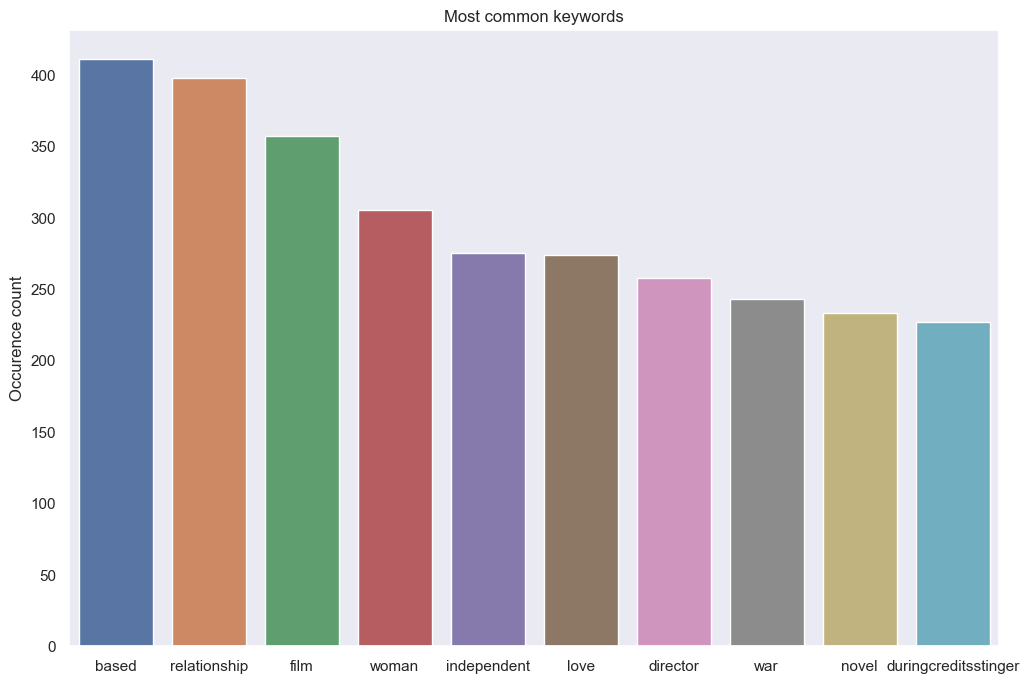

In [168]:
from collections import Counter


all_words = " ".join(df_keywords['keywords_sentence']).split()
a,b = zip(*Counter(all_words).most_common(10))
print(a)
plt.figure(figsize=(12,8))
sns.barplot(x=list(a),y=list(b))
plt.title('Most common keywords')
plt.ylabel('Occurence count')

Everything makes sense. The 10th keyword (duringcreditsstinger) is weird, but actually means a movie that has an after credits scene

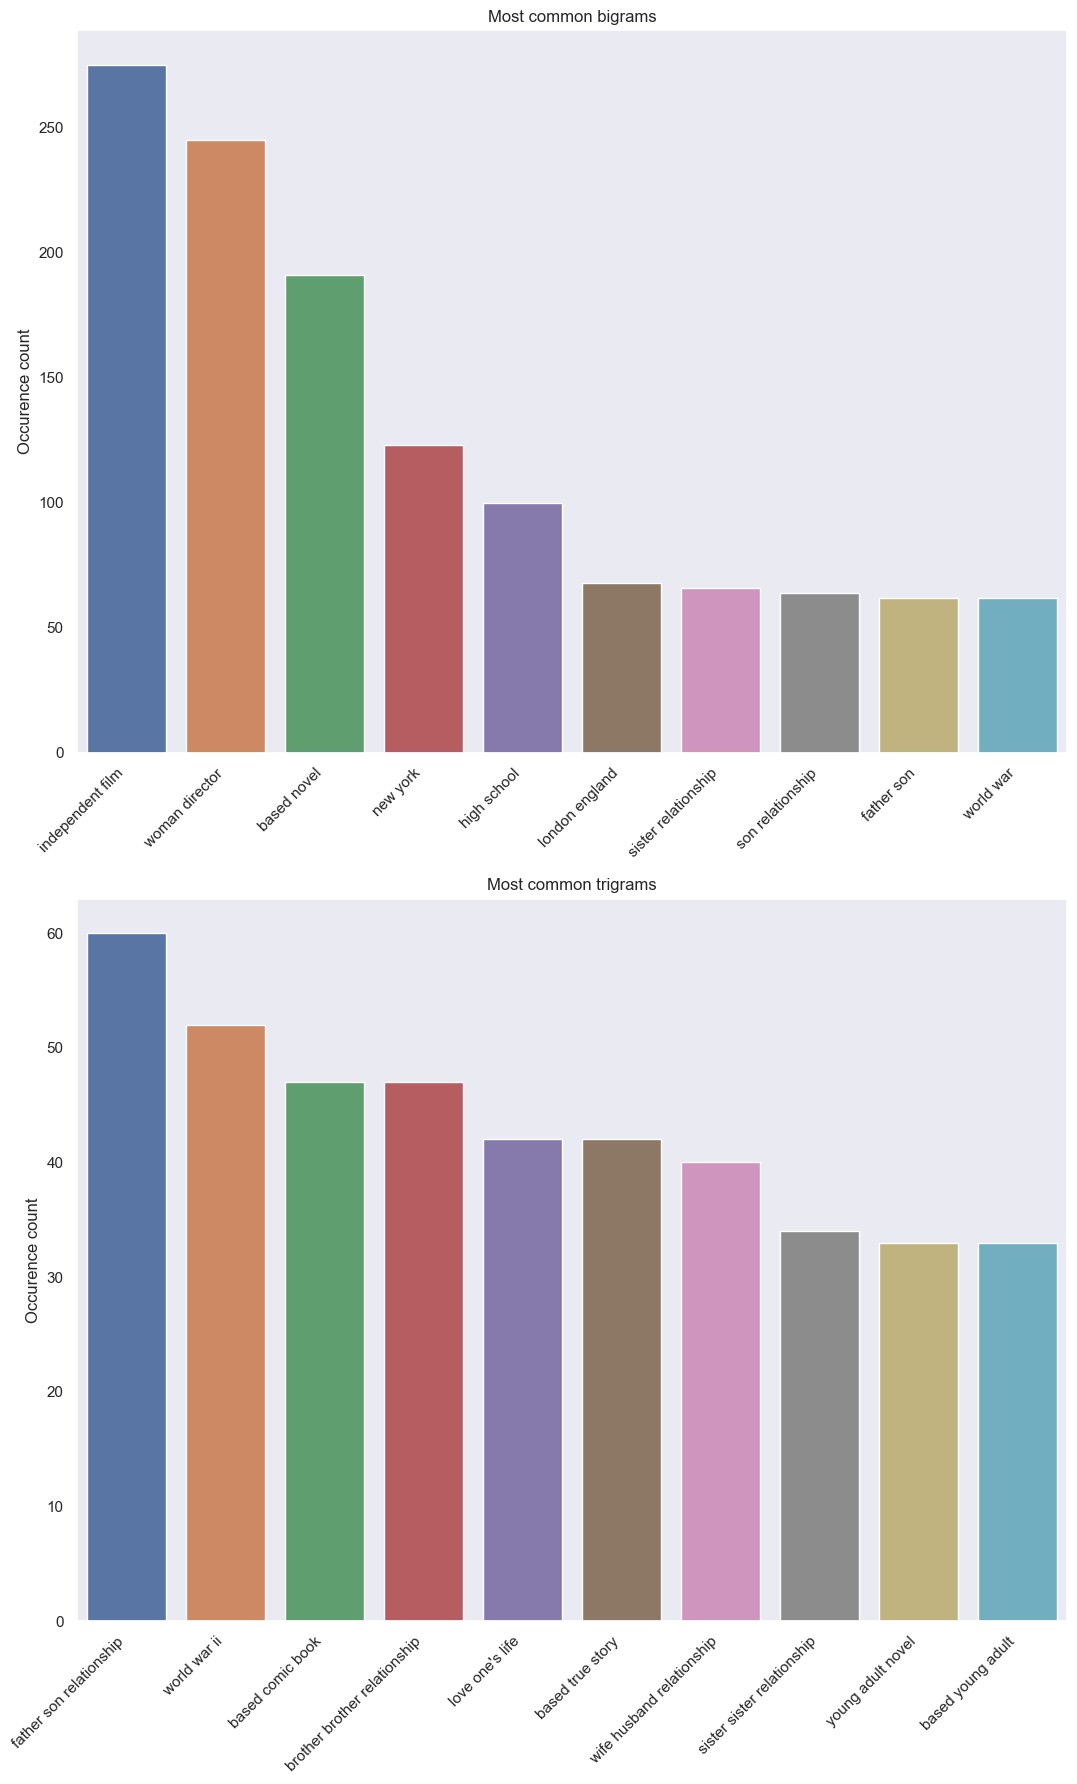

In [169]:
from nltk import bigrams, trigrams
df_keywords_bigrams = pd.Series(list(map(' '.join, list(bigrams(all_words)))))
df_keywords_trigrams = pd.Series(list(map(' '.join, list(trigrams(all_words)))))
df_keywords_bigrams.value_counts()
df_keywords_trigrams.value_counts()

fig, ax = plt.subplots(2,1,figsize=(11,18))
sns.barplot(ax=ax[0], x=df_keywords_bigrams.value_counts().index[0:10], y=df_keywords_bigrams.value_counts().values[0:10])
ax[0].set_xticklabels(labels=df_keywords_bigrams.value_counts().index[0:10], rotation=45, ha='right')
ax[0].set_title('Most common bigrams')
ax[0].set_ylabel('Occurence count')

sns.barplot(ax=ax[1], x=df_keywords_trigrams.value_counts().index[0:10], y=df_keywords_trigrams.value_counts().values[0:10])
ax[1].set_xticklabels(labels=df_keywords_trigrams.value_counts().index[0:10], rotation=45, ha='right')
ax[1].set_title('Most common trigrams')
ax[1].set_ylabel('Occurence count')

fig.tight_layout()

Looks like there is a theme for the most common bigrams and trigrams, most of them deal with relationships and interactions between people.  
The other theme seems to be movies that are based on something...

In [170]:
keywords_genre = df_keywords.melt(id_vars='keywords_sentence', value_vars=genre_list)

Now we should look at the most common keywords per genre

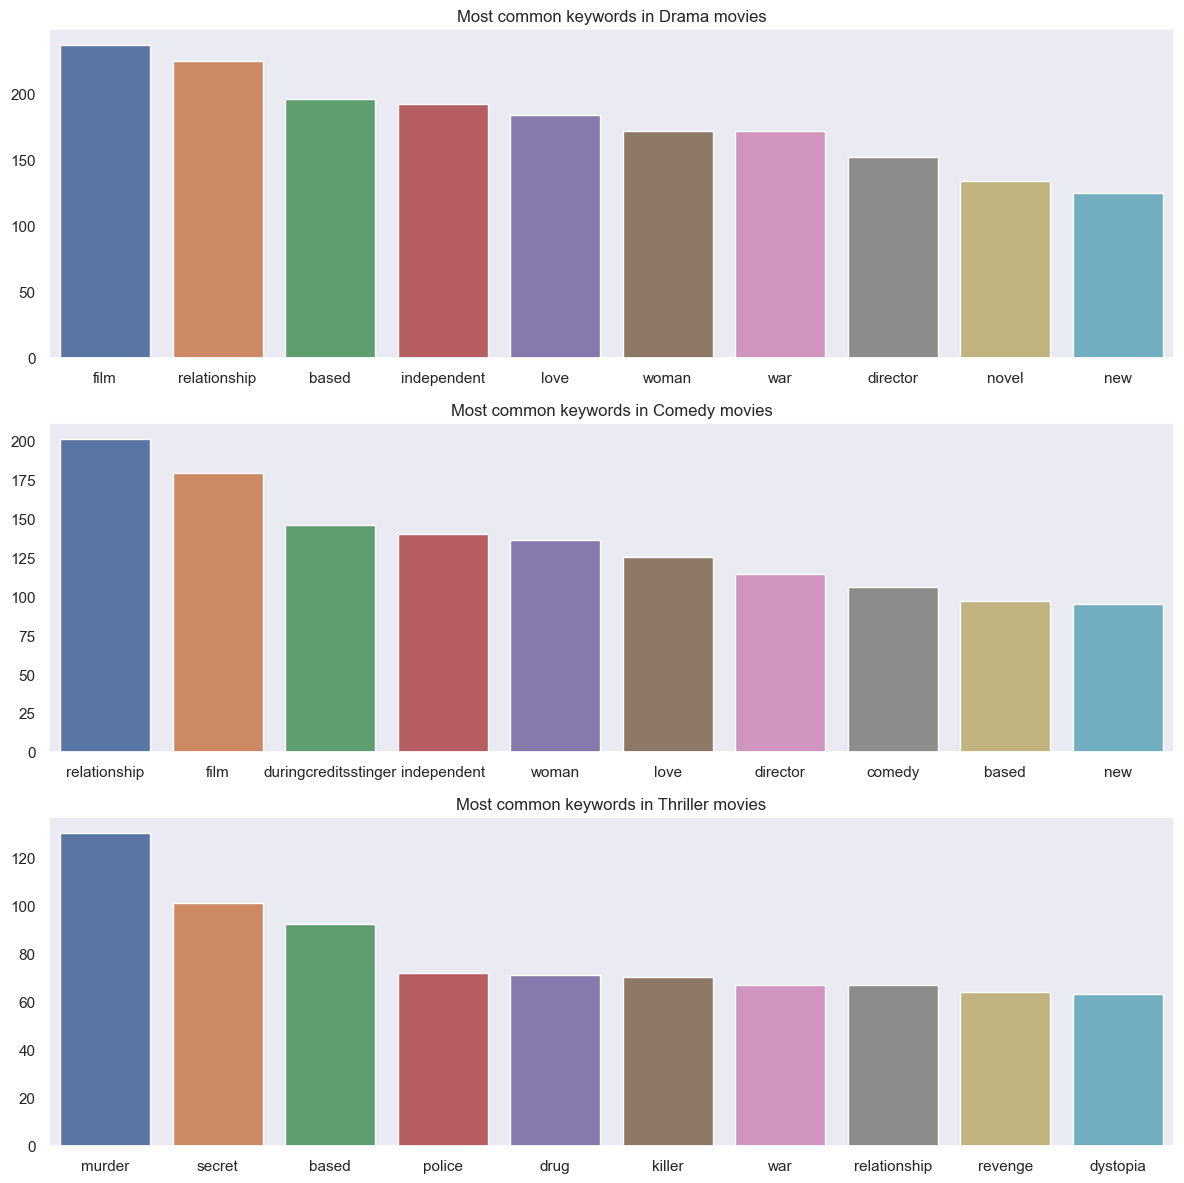

In [171]:
fig, ax = plt.subplots(3,1,figsize=(12,12))
for i, genre in enumerate(['Drama','Comedy','Thriller']):
    all_words = " ".join(keywords_genre[keywords_genre['value']==genre]['keywords_sentence']).split()
    a,b = zip(*Counter(all_words).most_common(10))
    
    sns.barplot(ax=ax[i], x=list(a),y=list(b))
    ax[i].set_title(f'Most common keywords in {genre} movies')
fig.tight_layout()

Drama movies seem to have alot of keywords related to relationships, which makes sense.  
Many Comedy movies have an after credits scene, but other than that deal with pretty much the same as Drama movies.  
Thriller movies have mostly keywords related to action, spying, secrets, so on... Again, makes sense.

## Vectorization 

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

Let's vectorize our keywords sentences

In [173]:
df_keywords['keywords_sentence'].head()

0     culture clash future space war space colony s...
1     ocean drug abuse exotic island east india tra...
2     spy based novel secret agent sequel mi6 briti...
3     dc comics crime fighter terrorist secret iden...
4     based novel mars medallion space travel princ...
Name: keywords_sentence, dtype: object

The shape of the bag of words will be the number of sentences X the number of words in all the sentences

In [174]:
X = CountVectorizer()
bow = X.fit_transform(df_keywords['keywords_sentence'])
print(bow.shape)
print(bow.nnz)

(4504, 5729)
37307


Taking an example sentence, and looking at the BOW, we see how many words appear in each sentence, for this example the word "space" appears 4 times, so the feature at position 4744 has 4

In [175]:
print(df_keywords['keywords_sentence'][0])
print(bow[0])
print(X.get_feature_names_out()[4744])

 culture clash future space war space colony society space travel futuristic romance space alien
  (0, 1282)	1
  (0, 992)	1
  (0, 2043)	1
  (0, 4744)	4
  (0, 5553)	1
  (0, 1058)	1
  (0, 4708)	1
  (0, 5282)	1
  (0, 2044)	1
  (0, 4297)	1
  (0, 120)	1
space


Let's turn the BOW into TF-IDF matrix

In [176]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf_trans = TfidfTransformer().fit(bow)
tf_idf = tf_idf_trans.transform(bow)

Looking at the most frequent words in the BOW, we find the ones that we saw earlier

In [177]:
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in X.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('based', 411),
 ('relationship', 398),
 ('film', 357),
 ('woman', 313),
 ('independent', 275),
 ('love', 274),
 ('director', 258),
 ('war', 243),
 ('novel', 233),
 ('duringcreditsstinger', 227)]

Looking at TF-IDF, we can see that feature 4744 ('space' word) is again the highest values one (appearing 4 times in the sentence but also probably not alot in the rest of the corpus)

In [178]:
print(tf_idf[0])

  (0, 5553)	0.14806010095383784
  (0, 5282)	0.18282268491459885
  (0, 4744)	0.7294482752964437
  (0, 4708)	0.22858649032103653
  (0, 4297)	0.21618633717924204
  (0, 2044)	0.2570954323070773
  (0, 2043)	0.19230921896313422
  (0, 1282)	0.232032703804877
  (0, 1058)	0.2536492188232368
  (0, 992)	0.247608898258542
  (0, 120)	0.17607613341992528


In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

Using the Tfidf vectorizar, we can both fit and transform the VOW into TF-IDF. Now we also add the names of the movies to 'keywords_sentence' so the recommender model takes the title into consideration.  
"title_strength" denotes how much stronger the title will be compared to the rest of the keywords, by adding the title multiple times to the analyzed sentence.

In [180]:
title_strength = 5
keywords_N_title = (df_keywords['title'] +" " )*title_strength + df_keywords['keywords_sentence']
tf_idf = vect.fit_transform(keywords_N_title)
print(keywords_N_title[10:15])
print(tf_idf[1])
vect.get_feature_names_out()[1229]

10    Superman Returns Superman Returns Superman Ret...
11    Quantum of Solace Quantum of Solace Quantum of...
12    Pirates of the Caribbean: Dead Man's Chest Pir...
13    The Lone Ranger The Lone Ranger The Lone Range...
14    Man of Steel Man of Steel Man of Steel Man of ...
dtype: object
  (0, 250)	0.10392095550670959
  (0, 6658)	0.0712365311528624
  (0, 8260)	0.04571141361793963
  (0, 7163)	0.091661554886721
  (0, 6660)	0.08466690814621547
  (0, 7652)	0.08299789712059363
  (0, 4312)	0.053757710540218766
  (0, 5230)	0.06086581357649428
  (0, 4420)	0.04700197494325776
  (0, 1601)	0.07959899323394935
  (0, 7638)	0.09525729774058224
  (0, 3739)	0.08466690814621547
  (0, 2357)	0.08084993799331146
  (0, 3877)	0.06647724960279465
  (0, 2584)	0.08084993799331146
  (0, 111)	0.0725196070766935
  (0, 2286)	0.057104955823534025
  (0, 5197)	0.07741974744178265
  (0, 2460)	0.39230967756975726
  (0, 8288)	0.269166167629279
  (0, 489)	0.3979949661697468
  (0, 1229)	0.48768068906721435
  (0, 7474

'caribbean'

Now the strongest feature is the name of the movie.

# Recommender system

It's time to calculate the cosine similarity between the TF-IDF sentences.  
The recommender accepts a seach term and returns the 5 (if there are) most similar movies according to both the title and the keywords.

In [181]:
from sklearn.metrics.pairwise import cosine_similarity

search_keywords = "machine"
query = vect.transform([search_keywords])
similarity = cosine_similarity(query, tf_idf).flatten()

similarity_indices = np.argpartition(similarity,-5)[-5:][::-1]

non_zero_indices = [x for x in similarity_indices if similarity[x] != 0]
df_keywords.iloc[non_zero_indices][['title','keywords_sentence']]

,title,keywords_sentence
466,The Time Machine,future time machine
3713,Mean Machine,prison sport amateur soccer soccer coach
1675,Machine Gun Preacher,underage soldier duringcreditsstinger
1344,Hot Tub Time Machine,female nudity one-night stand time travel tim...
2720,Hot Tub Time Machine 2,time travel sequel hot tub duringcreditsstinger


Let's add one more feature to the 'keywords_sentence', the actors names.  
Adding the cast name with a certain "strength" (the same way as the title of the movie) will allow us to create a recommender system that also takes the actors in the movies into consideration. 

In [182]:
cast_strength = 1
keywords_title_cast = df_keywords.apply(lambda x: title_strength*(x['title'] +" " ) + x['keywords_sentence']+" " +cast_strength*df_cast[df_cast['id'] == x['id']][actor_list].to_string(header=False,index=False), axis=1)

In [183]:
keywords_title_cast = keywords_title_cast.apply(clean_text)

In [184]:
vect_2 = TfidfVectorizer(ngram_range=(1,2))

tf_idf = vect_2.fit_transform(keywords_title_cast)

And so we get a recommender system that takes the title of the movie, the cast, and the keywords into consideration.

In [185]:
search_keywords = "hunger"
query = vect_2.transform([search_keywords])
similarity = cosine_similarity(query, tf_idf).flatten()

similarity_indices = np.argpartition(similarity,-5)[-5:][::-1]

non_zero_indices = [x for x in similarity_indices if similarity[x] != 0]
df_keywords.iloc[non_zero_indices][['title','keywords_sentence']]

,title,keywords_sentence
102,The Hunger Games: Mockingjay - Part 2,revolution strong woman dystopia game death 3...
426,The Hunger Games,hallucination dystopia female protagonist bow...
200,The Hunger Games: Mockingjay - Part 1,resistance post-apocalyptic dystopia war sequ...
183,The Hunger Games: Catching Fire,competition based novel mentor secret factory...
4469,Aqua Teen Hunger Force Colon Movie Film for Th...,africa blood splatter surrealism blood robot ...


Even though we got to the end of this notebook, there are many more things we can explore, both EDA and machine learning techniques:  
- We can explore the crew and look at the directors statistics, and create a machine learning algorithm that takes it into consideration.
- We can try and look at the "overview" feature which has more text for each movie, and get more information for the recommender system.
- Not alot of feature engineering was done here, we can do some more and try and create features that will help us decide what movies to recommend.
- This dataset is built for content based recommender system, but a radical idea would be to create another column that includes specific user interest, fill it with similar movies, and explore the dataset as collaborative filtering system.

I hope you enjoyed this analysis, remember that I am a beginner and this analysis might be simple and have some mistakes.  
If you liked it, I will be more than grateful if you could go to my github repo at https://github.com/DanielHelps/TMDB-movies-analysis-and-predition and star it :) 